# Analysing Impact of sentiment and emotions on social media engagement

#### In this notebook, twitter data will be analyzed to find sentiments and emotions of tweets and the dataset will be analyzed to understand the impact of independent variables on factors determining social media engagement such as 'Likes' and 'Retweets'. 

#### For emotion detection, Roberta based transformer model will be utilized to determine basic emotion probabilities and this data is further used to feed verious machine learning models using H20 Auto ML to predict,calculate dependence and to determine variable importance. 

## Installing necessary Libraries

In [1]:
!pip install torch torchvision torchaudio
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install wordcloud
!pip install tranformers
!pip install translate
!pip install nltk


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement tranformers (from versions: none)
ERROR: No matching distribution found for tranformers
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Data Loading

In [2]:
!pip install openpyxl

import pandas as pd

# Load the dataset
file_path = 'Twitterdatainsheets.xlsx'

# Read all three sheets into separate DataFrames
sheet1 = pd.read_excel(file_path, sheet_name='Tweet', engine='openpyxl')
sheet2 = pd.read_excel(file_path, sheet_name='Location', engine='openpyxl')
sheet3 = pd.read_excel(file_path, sheet_name='User', engine='openpyxl')

# Display the first few rows of each sheet to understand the structure
sheet1.head()


Defaulting to user installation because normal site-packages is not writeable


TweetID   Weekday   Hour   Day  Lang   IsReshare   Reach  \
0  tw-682712873332805633  Thursday   17.0  31.0    en         0.0    44.0   
1  tw-682713045357998080  Thursday   17.0  31.0    en         1.0  1810.0   
2  tw-682713219375476736  Thursday   17.0  31.0    en         0.0   282.0   
3  tw-682713436967579648  Thursday   17.0  31.0    en         0.0  2087.0   
4  tw-682714048199311366  Thursday   17.0  31.0    en         0.0   953.0   

    RetweetCount   Likes   Klout   Sentiment  \
0            0.0     0.0    35.0         0.0   
1            5.0     0.0    53.0         2.0   
2            0.0     0.0    47.0         0.0   
3            4.0     0.0    53.0         0.0   
4            0.0     0.0    47.0         0.0   

                                                text   LocationID  \
0  We are hiring: Senior Software Engineer - Prot...       3751.0   
1  RT @CodeMineStatus: This is true Amazon Web Se...       3989.0   
2  Devops Engineer Aws Ansible Cassandra Mysql Ub...       3741.0   
3  Happy New Year to all those AWS instances of o...       3753.0   
4  Amazon is hiring! #Sr. #International Tax Mana...       3751.0   

          UserID  
0    tw-40932430  
1  tw-3179389829  
2  tw-4624808414  
3   tw-356447127  
4  tw-3172686669

In [3]:
sheet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TweetID        100000 non-null  object 
 1    Weekday       100000 non-null  object 
 2    Hour          100000 non-null  float64
 3    Day           100000 non-null  float64
 4    Lang          100000 non-null  object 
 5    IsReshare     100000 non-null  float64
 6    Reach         100000 non-null  float64
 7    RetweetCount  100000 non-null  float64
 8    Likes         100000 non-null  float64
 9    Klout         100000 non-null  float64
 10   Sentiment     100000 non-null  float64
 11   text          99996 non-null   object 
 12   LocationID    100000 non-null  float64
 13   UserID        100000 non-null  object 
dtypes: float64(9), object(5)
memory usage: 10.7+ MB


In [4]:
# Strip spaces from the column names
sheet1.columns = sheet1.columns.str.strip()
sheet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   TweetID       100000 non-null  object 
 1   Weekday       100000 non-null  object 
 2   Hour          100000 non-null  float64
 3   Day           100000 non-null  float64
 4   Lang          100000 non-null  object 
 5   IsReshare     100000 non-null  float64
 6   Reach         100000 non-null  float64
 7   RetweetCount  100000 non-null  float64
 8   Likes         100000 non-null  float64
 9   Klout         100000 non-null  float64
 10  Sentiment     100000 non-null  float64
 11  text          99996 non-null   object 
 12  LocationID    100000 non-null  float64
 13  UserID        100000 non-null  object 
dtypes: float64(9), object(5)
memory usage: 10.7+ MB


In [5]:
sheet2.head()

LocationID  Country        State StateCode         City
0         1.0  Albania      Elbasan        AL      Elbasan
1         2.0  Albania       Tirane        AL       Tirana
2         3.0  Algeria   Souk Ahras        DZ   Souk Ahras
3         4.0  Algeria        Alger        DZ      Algiers
4         5.0  Algeria  Constantine        DZ  Constantine

In [6]:
sheet2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6291 entries, 0 to 6290
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LocationID  6289 non-null   float64
 1   Country     6290 non-null   object 
 2   State       6174 non-null   object 
 3   StateCode   6180 non-null   object 
 4   City        6132 non-null   object 
dtypes: float64(1), object(4)
memory usage: 245.9+ KB


In [7]:
sheet3.head()

UserID   Gender
0  tw-1267804344  Unknown
1    tw-27229880     Male
2   tw-199664730     Male
3    tw-99958381  Unknown
4   tw-126745533     Male

In [8]:
sheet3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   UserID  100000 non-null  object
 1   Gender  100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [9]:
# Merging sheet1 and sheet2 on the 'id' column
merged_df1 = pd.merge(sheet1, sheet2, on='LocationID', how='outer')

# Merging the result with sheet3 on the 'id' column
final_df = pd.merge(merged_df1, sheet3, on='UserID', how='outer')

# Display the first few rows of the final merged DataFrame
final_df.head()

TweetID    Weekday  Hour   Day Lang  IsReshare  Reach  \
0                    NaN        NaN   NaN   NaN  NaN        NaN    NaN   
1  tw-686910776288907264    Tuesday   7.0  12.0   en        0.0  991.0   
2  tw-686915376823795713    Tuesday   7.0  12.0   en        0.0  991.0   
3  tw-699314732281409536     Monday  12.0  15.0   en        0.0  390.0   
4  tw-712867961141334017  Wednesday  23.0  23.0   es        0.0  402.0   

   RetweetCount  Likes  Klout  Sentiment  \
0           NaN    NaN    NaN        NaN   
1           1.0    0.0   42.0       1.00   
2           1.0    0.0   42.0       1.00   
3           0.0    0.0   25.0      -2.00   
4           0.0    0.0   32.0       0.17   

                                                text  LocationID  \
0                                                NaN         NaN   
1  .@SailPoint chooses @Dynatrace @Ruxit for its ...      3811.0   
2  .@SailPoint chooses @Dynatrace @Ruxit for easy...      3811.0   
3  Validation for private cloud or the dominance ...      3766.0   
4                      @Ruso_tv aws  tu a mi corazon      1961.0   

               UserID        Country          State StateCode          City  \
0  _x001A_nknow531394            NaN            NaN       NaN           NaN   
1         tw-10000632  United States       Michigan     US-MI       Detroit   
2         tw-10000632  United States       Michigan     US-MI       Detroit   
3        tw-100012605  United States  Massachusetts     US-MA        Boston   
4       tw-1000137907         Mexico     Tamaulipas        MX  Nuevo Laredo   

   Gender  
0    Male  
1  Female  
2  Female  
3  Unisex  
4  Female

## Data cleaning and pre processing
#### check for missing values
#### Ensure data types are appropriate

In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170518 entries, 0 to 170517
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   TweetID       102063 non-null  object 
 1   Weekday       102063 non-null  object 
 2   Hour          102063 non-null  float64
 3   Day           102063 non-null  float64
 4   Lang          102063 non-null  object 
 5   IsReshare     102063 non-null  float64
 6   Reach         102063 non-null  float64
 7   RetweetCount  102063 non-null  float64
 8   Likes         102063 non-null  float64
 9   Klout         102063 non-null  float64
 10  Sentiment     102063 non-null  float64
 11  text          102059 non-null  object 
 12  LocationID    104042 non-null  float64
 13  UserID        168537 non-null  object 
 14  Country       104043 non-null  object 
 15  State         102117 non-null  object 
 16  StateCode     102289 non-null  object 
 17  City          101728 non-null  object 
 18  Gend

In [11]:
import re

# Remove duplicate rows
final_df.drop_duplicates(inplace=True)

# Remove rows with missing values in critical columns (e.g., 'text')
final_df.dropna(subset=['text'], inplace=True)

# Optionally, fill missing values in other columns
final_df.fillna('', inplace=True)


# Ensure correct data types
final_df['Hour'] = pd.to_numeric(final_df['Hour'], errors='coerce').fillna(0).astype(int)
final_df['Day'] = pd.to_numeric(final_df['Day'], errors='coerce').fillna(0).astype(int)
final_df['IsReshare'] = final_df['IsReshare'].astype(bool)

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove non-whitespace characters followed by '@'
    text = re.sub(r'@\S+', '', text)
    # Remove special characters and numbers (keeping only letters and spaces)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Convert to lowercase
    text = text.lower()
    return text

final_df['text'] = final_df['text'].apply(clean_text)


# Drop the 'TweetID','UserID' and 'LocationID' columns from the dataframe
cleaned_text_df = final_df.drop(columns=['TweetID', 'UserID','LocationID'])

cleaned_text_df.head()


Weekday  Hour  Day Lang  IsReshare  Reach  RetweetCount  Likes  Klout  \
1    Tuesday     7   12   en      False  991.0           1.0    0.0   42.0   
2    Tuesday     7   12   en      False  991.0           1.0    0.0   42.0   
3     Monday    12   15   en      False  390.0           0.0    0.0   25.0   
4  Wednesday    23   23   es      False  402.0           0.0    0.0   32.0   
5   Thursday    21   24   es      False  403.0           0.0    0.0   32.0   

   Sentiment                                               text  \
1       1.00      chooses for its easy integration with aws apm   
2       1.00             chooses for easy integration w aws apm   
3      -2.00  validation for private cloud or the dominance ...   
4       0.17                                aws tu a mi corazon   
5       0.20                   aws espero que sea pronto mi nio   

         Country          State StateCode          City  Gender  
1  United States       Michigan     US-MI       Detroit  Female  
2  United States       Michigan     US-MI       Detroit  Female  
3  United States  Massachusetts     US-MA        Boston  Unisex  
4         Mexico     Tamaulipas        MX  Nuevo Laredo  Female  
5         Mexico     Tamaulipas        MX  Nuevo Laredo  Female

In [12]:
cleaned_text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102059 entries, 1 to 168536
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Weekday       102059 non-null  object 
 1   Hour          102059 non-null  int64  
 2   Day           102059 non-null  int64  
 3   Lang          102059 non-null  object 
 4   IsReshare     102059 non-null  bool   
 5   Reach         102059 non-null  float64
 6   RetweetCount  102059 non-null  float64
 7   Likes         102059 non-null  float64
 8   Klout         102059 non-null  float64
 9   Sentiment     102059 non-null  float64
 10  text          102059 non-null  object 
 11  Country       102059 non-null  object 
 12  State         102059 non-null  object 
 13  StateCode     102059 non-null  object 
 14  City          102059 non-null  object 
 15  Gender        102059 non-null  object 
dtypes: bool(1), float64(5), int64(2), object(8)
memory usage: 12.6+ MB


In [13]:
cleaned_text_df.to_csv('cleaned_twitter_text_data.csv')

In [14]:
cleaned_text_df = pd.read_csv('cleaned_twitter_text_data.csv')


In [15]:
# Check for missing values
missing_values = cleaned_text_df.isnull().sum()
missing_values

Unnamed: 0         0
Weekday            0
Hour               0
Day                0
Lang               0
IsReshare          0
Reach              0
RetweetCount       0
Likes              0
Klout              0
Sentiment          0
text              37
Country            0
State           1896
StateCode       1725
City            2278
Gender             1
dtype: int64

In [16]:
# Remove rows where 'text' column value is missing
data_cleaned = cleaned_text_df.dropna(subset=['text'])

# Replace missing values in 'State', 'StateCode', 'City', and 'Gender' columns with "unknown"
columns_to_fill = ['State', 'StateCode', 'City', 'Gender']
data_cleaned.loc[:, columns_to_fill] = data_cleaned[columns_to_fill].fillna('Unknown')

# Save the cleaned dataset to a new CSV file
data_cleaned.to_csv('cleaned_twitter_data.csv', index=False)


In [17]:
cleaned_data = pd.read_csv('cleaned_twitter_data.csv')
cleaned_data

Unnamed: 0    Weekday  Hour  Day Lang  IsReshare   Reach  \
0                1    Tuesday     7   12   en      False   991.0   
1                2    Tuesday     7   12   en      False   991.0   
2                3     Monday    12   15   en      False   390.0   
3                4  Wednesday    23   23   es      False   402.0   
4                5   Thursday    21   24   es      False   403.0   
...            ...        ...   ...  ...  ...        ...     ...   
102017      168532     Monday     6   21   en      False  5910.0   
102018      168533  Wednesday    10   10   en       True   716.0   
102019      168534   Thursday    13   21   en       True   399.0   
102020      168535  Wednesday     7   23   en       True    87.0   
102021      168536   Saturday     3    2   en      False   633.0   

        RetweetCount  Likes  Klout  Sentiment  \
0                1.0    0.0   42.0       1.00   
1                1.0    0.0   42.0       1.00   
2                0.0    0.0   25.0      -2.00   
3                0.0    0.0   32.0       0.17   
4                0.0    0.0   32.0       0.20   
...              ...    ...    ...        ...   
102017           1.0    0.0   55.0       0.00   
102018          24.0    0.0    0.0       0.00   
102019          16.0    0.0   43.0       1.00   
102020         154.0    0.0   20.0       0.00   
102021           0.0    0.0   38.0       0.00   

                                                     text        Country  \
0           chooses for its easy integration with aws apm  United States   
1                  chooses for easy integration w aws apm  United States   
2       validation for private cloud or the dominance ...  United States   
3                                     aws tu a mi corazon         Mexico   
4                        aws espero que sea pronto mi nio         Mexico   
...                                                   ...            ...   
102017  were hosting a week of tech events including a...    Netherlands   
102018               rt amazons updated aws service terms    Switzerland   
102019  rt amazon now offering free https certificates...  United States   
102020                  rt i gave the developers aws keys        Germany   
102021  cloudticity achieves aws managed service progr...  United States   

                State StateCode           City   Gender  
0            Michigan     US-MI        Detroit   Female  
1            Michigan     US-MI        Detroit   Female  
2       Massachusetts     US-MA         Boston   Unisex  
3          Tamaulipas        MX   Nuevo Laredo   Female  
4          Tamaulipas        MX   Nuevo Laredo   Female  
...               ...       ...            ...      ...  
102017  North Holland        NL      Amsterdam  Unknown  
102018         Zurich        CH     Winterthur     Male  
102019       Illinois     US-IL      Hampshire   Unisex  
102020        Bavaria        DE         Munich     Male  
102021       New York     US-NY  New York City  Unknown  

[102022 rows x 17 columns]

In [18]:
# Check for missing values
missing_values = cleaned_data.isnull().sum()
missing_values

Unnamed: 0      0
Weekday         0
Hour            0
Day             0
Lang            0
IsReshare       0
Reach           0
RetweetCount    0
Likes           0
Klout           0
Sentiment       0
text            0
Country         0
State           0
StateCode       0
City            0
Gender          0
dtype: int64

# Data visualization

### Word cloud
##### A word cloud to visualize the most frequently used words in the tweets.

Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stopwords for language 'japanese' are not available in NLTK.
Stopwords for language 'korean' are not available in NLTK.
Stopwords for language 'lithuanian' are not available in NLTK.
Stopwords for language 'tagalog' are not available in NLTK.
Stopwords for language 'thai' are not available in NLTK.
Stopwords for language 'welsh' are not available in NLTK.
Stopwords for language 'polish' are not available in NLTK.
Stopwords for language 'czech' are not available in NLTK.
Stopwords for language 'estonian' are not available in NLTK.
Stopwords for language 'latvian' are not available in NLTK.
Stopwords for language 'hindi' are not available in NLTK.
Stopwords for language 'slovenian' are not available in NLTK.
Stopwords for language 'ukrainian' are not available in NLTK.


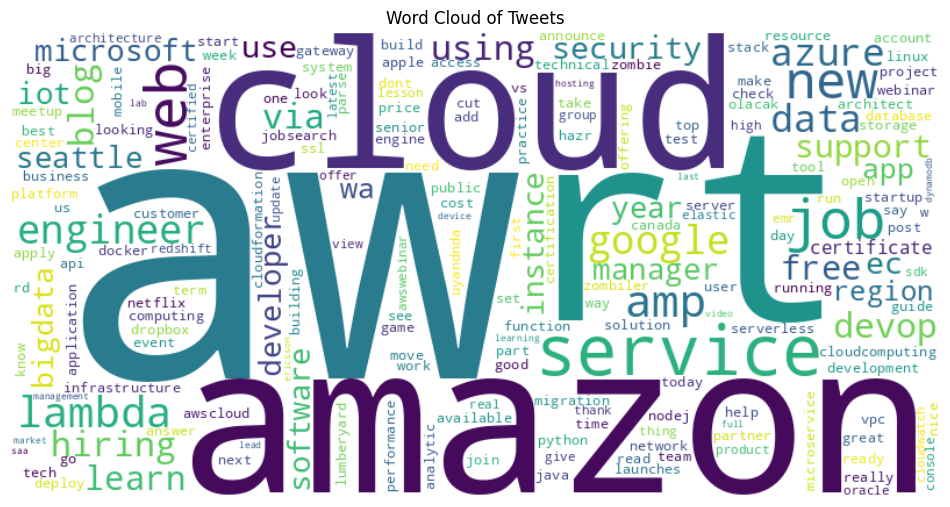

In [19]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import nltk

# Download necessary stopwords from nltk
nltk.download('stopwords')

# Identify unique languages in the dataset
unique_languages = cleaned_data['Lang'].unique()
unique_languages


# Define a mapping from language codes to stopwords in NLTK
lang_map = {
    'en': 'english', 'es': 'spanish', 'ja': 'japanese', 'fi': 'finnish', 'nl': 'dutch',
    'fr': 'french', 'in': 'indonesian', 'ko': 'korean', 'da': 'danish', 'lt': 'lithuanian',
    'de': 'german', 'tl': 'tagalog', 'pt': 'portuguese', 'zh': 'chinese', 'th': 'thai',
    'it': 'italian', 'cy': 'welsh', 'tr': 'turkish', 'pl': 'polish', 'cs': 'czech',
    'ro': 'romanian', 'hu': 'hungarian', 'et': 'estonian', 'sv': 'swedish', 'ru': 'russian',
    'no': 'norwegian', 'ar': 'arabic', 'lv': 'latvian', 'iw': 'hebrew', 'hi': 'hindi',
    'sl': 'slovenian', 'uk': 'ukrainian', 'eu': 'basque'
}

# Initialize stopwords for all identified languages
multi_lang_stopwords = set(STOPWORDS)

for lang_code in unique_languages:
    nltk_lang = lang_map.get(lang_code)
    if nltk_lang:
        try:
            multi_lang_stopwords.update(stopwords.words(nltk_lang))
        except OSError:
            print(f"Stopwords for language '{nltk_lang}' are not available in NLTK.")

# Combine all tweets into a single string for the word cloud
all_text = ' '.join(cleaned_data['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=multi_lang_stopwords, collocations=False).generate(all_text)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()



## Tweets by Weekday
##### A bar chart showing the count of tweets for each weekday to see on which days tweets are more frequent

/tmp/ipykernel_69892/299913533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x='Weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')


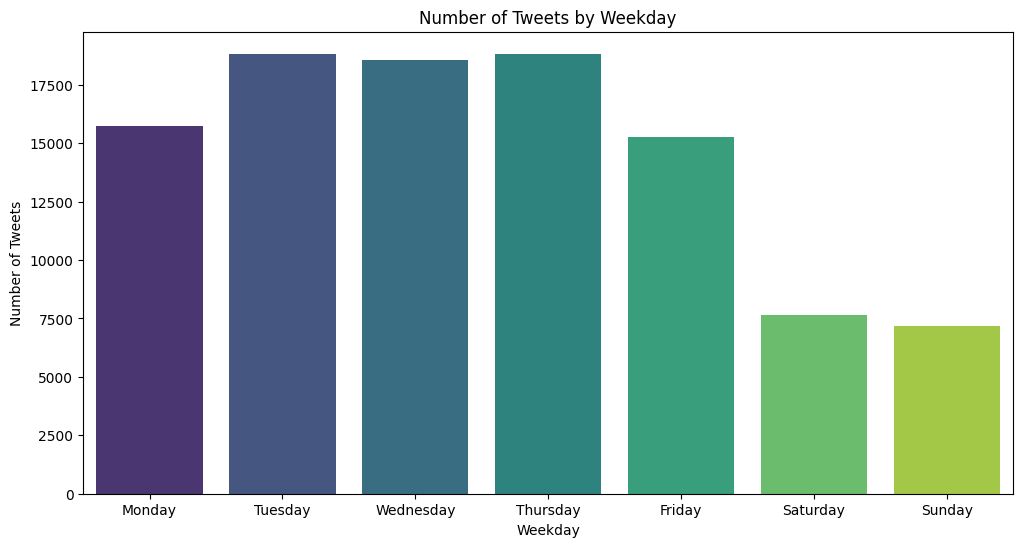

/tmp/ipykernel_69892/299913533.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x='Hour', palette='magma')


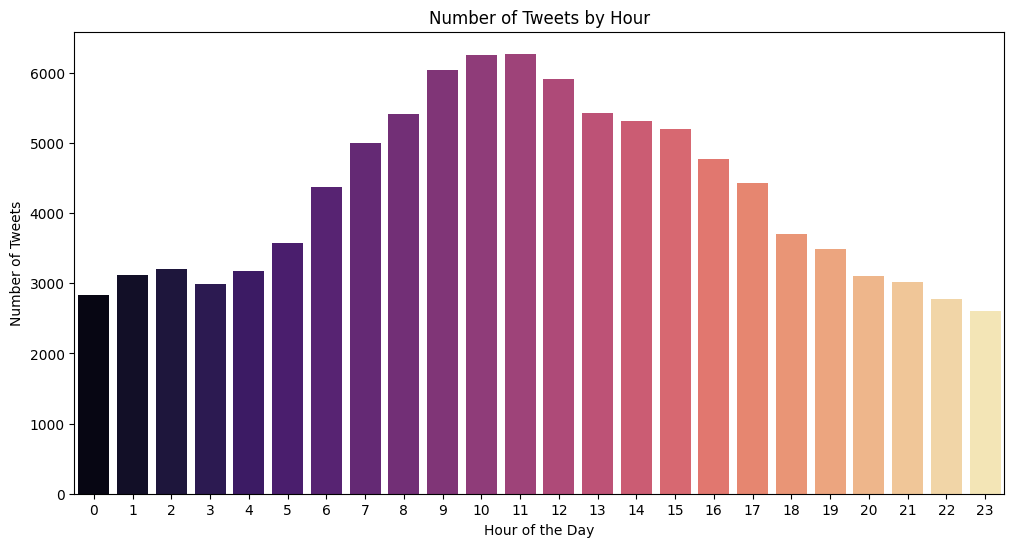

In [20]:
import seaborn as sns

# Tweets by Weekday
plt.figure(figsize=(12, 6))
sns.countplot(data=cleaned_data, x='Weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Number of Tweets by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Tweets')
plt.show()

# Tweets by Hour
plt.figure(figsize=(12, 6))
sns.countplot(data=cleaned_data, x='Hour', palette='magma')
plt.title('Number of Tweets by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.show()


## Gender Distribution

/tmp/ipykernel_69892/3368370784.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x='Gender', palette='Set2')


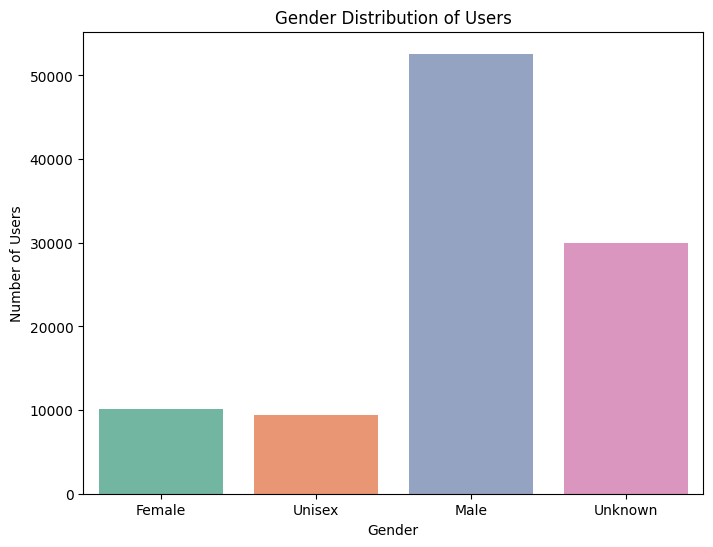

In [21]:
# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=cleaned_data, x='Gender', palette='Set2')
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

## Heatmap of tweet activity
##### A heatmap showing the distribution of tweets by hour and weekday

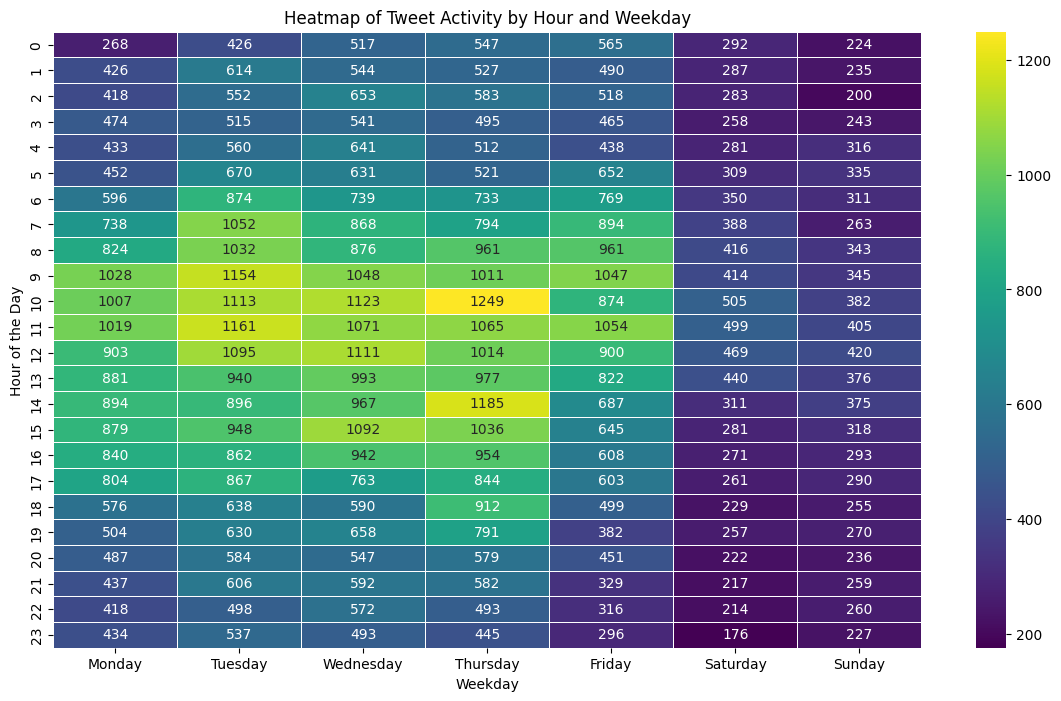

In [22]:
# Create a pivot table for the heatmap
heatmap_data = cleaned_data.pivot_table(index='Hour', columns='Weekday', values='text', aggfunc='count').reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='viridis', linewidths=.5, annot=True, fmt='g')
plt.title('Heatmap of Tweet Activity by Hour and Weekday')
plt.xlabel('Weekday')
plt.ylabel('Hour of the Day')
plt.show()


## Correlation matrix
##### A heatmap showing the correlation between different numerical variables (e.g., retweets, likes, reach, sentiment, etc.)

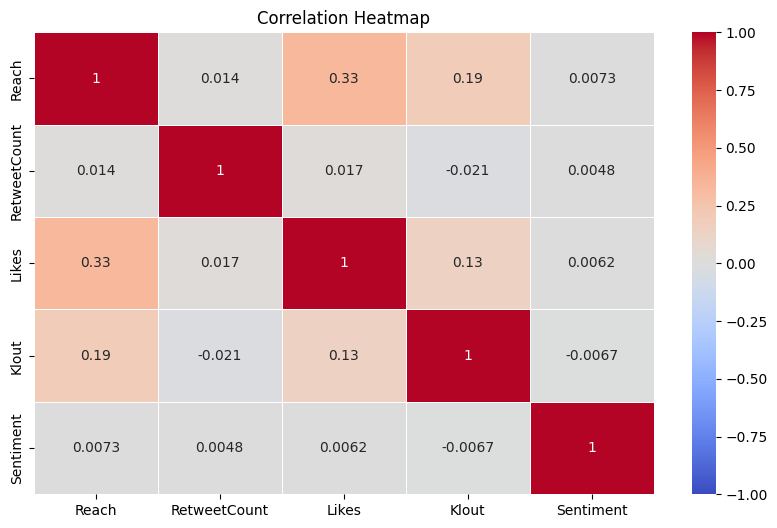

In [23]:
# Compute the correlation matrix
correlation_matrix = cleaned_data[['Reach', 'RetweetCount', 'Likes', 'Klout', 'Sentiment']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## Average sentiment by country

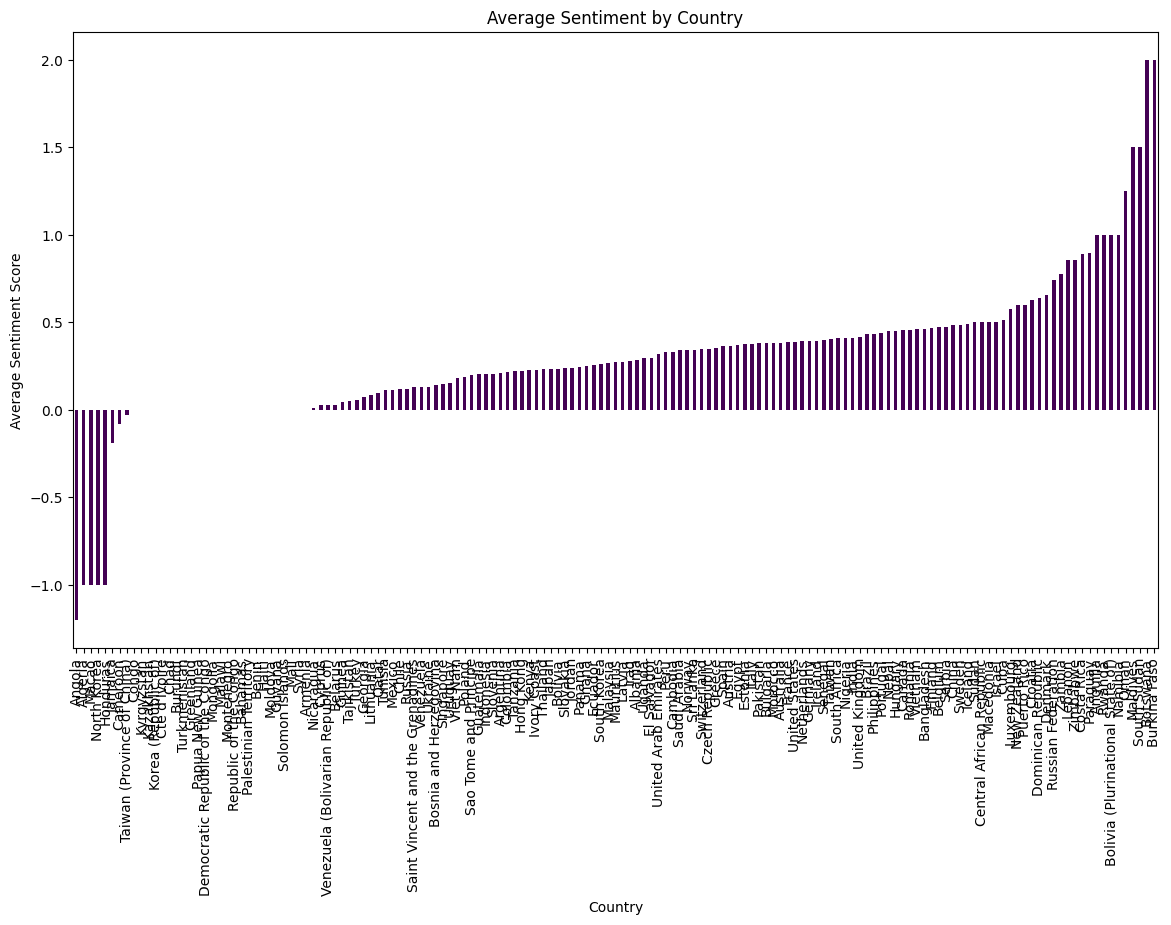

In [24]:
# Average Sentiment by Country
average_sentiment_by_country = cleaned_data.groupby('Country')['Sentiment'].mean().sort_values()

# Plot average sentiment by country
plt.figure(figsize=(14, 8))
average_sentiment_by_country.plot(kind='bar', colormap='viridis')
plt.title('Average Sentiment by Country')
plt.xlabel('Country')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=90)
plt.show()


## Average likes and retweets by gender

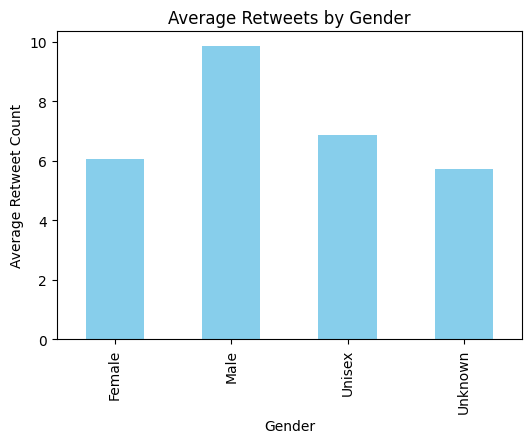

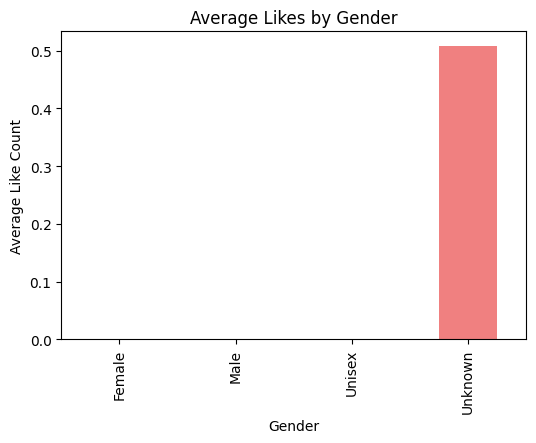

In [25]:
# Calculate average retweets and likes by gender
average_engagement_by_gender = cleaned_data.groupby('Gender').agg({'RetweetCount': 'mean', 'Likes': 'mean'})

# Plot average retweets by gender
plt.figure(figsize=(6, 4))
average_engagement_by_gender['RetweetCount'].plot(kind='bar', color='skyblue')
plt.title('Average Retweets by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Retweet Count')
plt.show()

# Plot average likes by gender
plt.figure(figsize=(6, 4))
average_engagement_by_gender['Likes'].plot(kind='bar', color='lightcoral')
plt.title('Average Likes by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Like Count')
plt.show()


## Distribution of tweets by language

/tmp/ipykernel_69892/148043131.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x='Lang', palette='coolwarm')


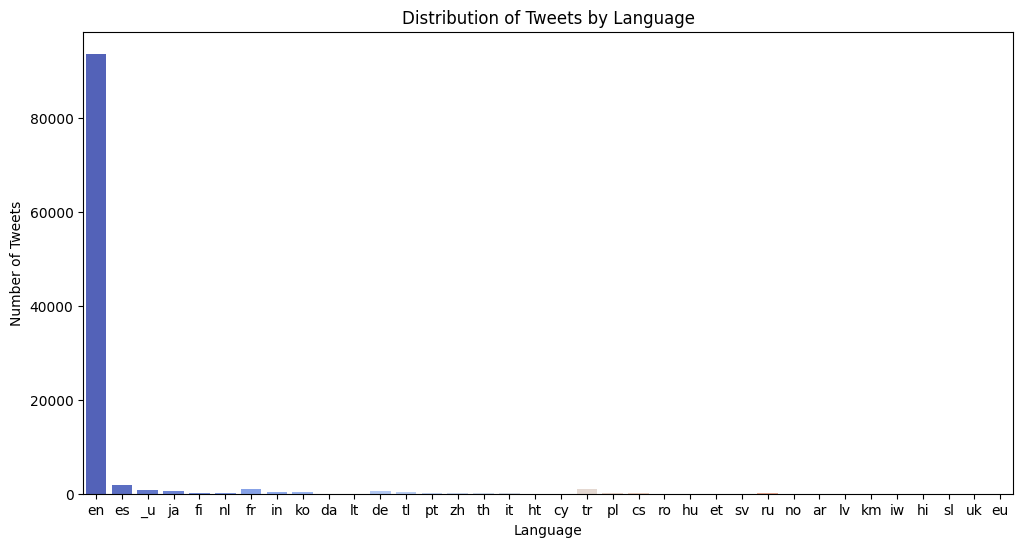

In [26]:
# Language Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=cleaned_data, x='Lang', palette='coolwarm')
plt.title('Distribution of Tweets by Language')
plt.xlabel('Language')
plt.ylabel('Number of Tweets')
plt.show()

## Distribution of tweets by country

/tmp/ipykernel_69892/2038779035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x='Country', order=cleaned_data['Country'].value_counts().index, palette='cool')


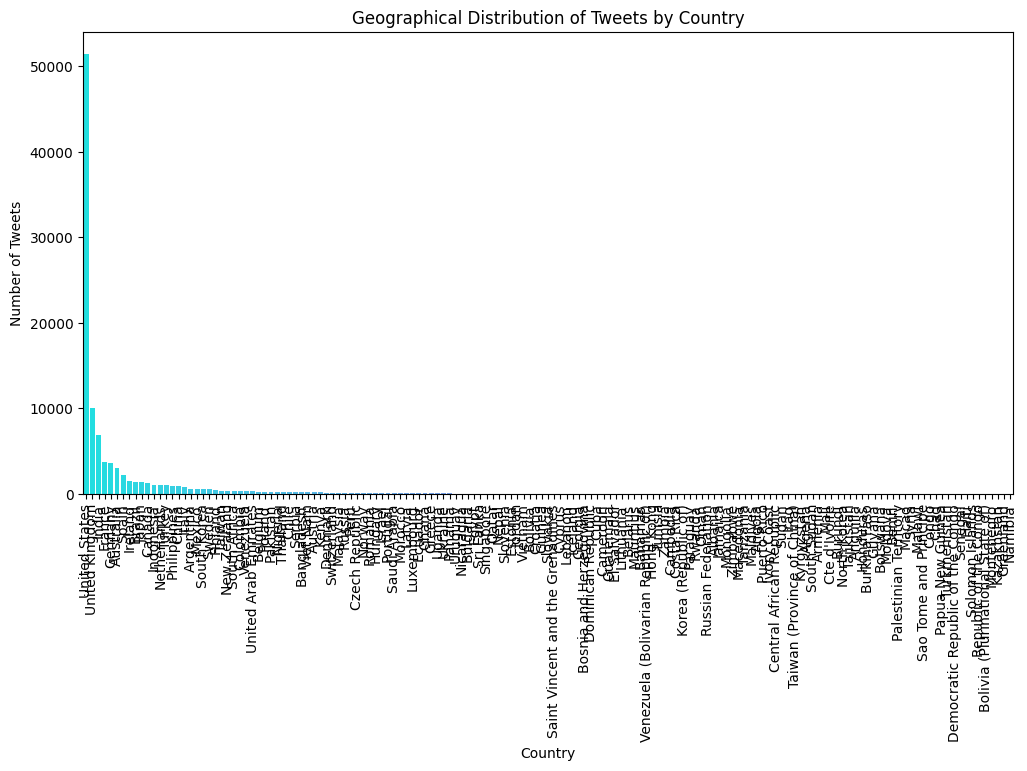

In [27]:
# Geographical Distribution of Tweets (Country-wise)
plt.figure(figsize=(12, 6))
sns.countplot(data=cleaned_data, x='Country', order=cleaned_data['Country'].value_counts().index, palette='cool')
plt.title('Geographical Distribution of Tweets by Country')
plt.xlabel('Country')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)
plt.show()

# Sentiment Analysis
#### Performing sentiment analysis using text blob

In [28]:
!pip install pandas transformers torch tqdm protobuf
!pip install translate
!pip install torch torchvision torchaudio
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [29]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load the emotion detection model
model_name = "cardiffnlp/twitter-roberta-base-emotion"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Retrieve the emotion labels from the model's configuration
emotion_labels = list(model.config.id2label.values())
print("Emotion labels:", emotion_labels)


In [30]:
from transformers import pipeline

# Load the emotion detection model
classifier = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-emotion", return_all_scores=True)

# Sample a few texts in different languages
sample_texts = {
    'English': cleaned_data[cleaned_data['Lang'] == 'en']['text'].iloc[0],
    'Spanish': cleaned_data[cleaned_data['Lang'] == 'es']['text'].iloc[0],
    'French': cleaned_data[cleaned_data['Lang'] == 'fr']['text'].iloc[0],
    'German': cleaned_data[cleaned_data['Lang'] == 'de']['text'].iloc[0],
    'Italian': cleaned_data[cleaned_data['Lang'] == 'it']['text'].iloc[0],
}

# Display the sampled texts
for lang, text in sample_texts.items():
    print(f"{lang} sample text: {text}")

# Classify the sample texts
sample_results = {lang: classifier(text) for lang, text in sample_texts.items()}

# Display the results
for lang, result in sample_results.items():
    print(f"{lang} sample classification result:")
    print(result)


/home/azureuser/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


English sample text: chooses for its easy integration with aws apm
Spanish sample text: aws tu a mi corazon
French sample text: rt comment utiliser packer pour dployer des images machine sur aws opensource
German sample text: aws azure und docker auf der berholspur
Italian sample text: aws amo a esa girl u
English sample classification result:
[[{'label': 'joy', 'score': 0.05426529422402382}, {'label': 'optimism', 'score': 0.699099600315094}, {'label': 'anger', 'score': 0.19541068375110626}, {'label': 'sadness', 'score': 0.05122439190745354}]]
Spanish sample classification result:
[[{'label': 'joy', 'score': 0.1501503884792328}, {'label': 'optimism', 'score': 0.5728238821029663}, {'label': 'anger', 'score': 0.129507377743721}, {'label': 'sadness', 'score': 0.1475183069705963}]]
French sample classification result:
[[{'label': 'joy', 'score': 0.24672743678092957}, {'label': 'optimism', 'score': 0.39124375581741333}, {'label': 'anger', 'score': 0.21247230470180511}, {'label': 'sadness', 

In [31]:
from transformers import pipeline
from tqdm import tqdm

# Load the emotion detection pipeline with the correct model
classifier = pipeline("text-classification", model=model_name, tokenizer=tokenizer, return_all_scores=True)

# Function to classify emotions and get the most probable emotion category with probabilities
def classify_emotions(texts, emotion_labels, batch_size=32):
    results = {label: [] for label in emotion_labels}
    best_emotions = []
    
    for i in tqdm(range(0, len(texts), batch_size), desc="Processing Batches"):
        batch_texts = texts[i:i+batch_size]
        predictions = classifier(batch_texts)
        for pred in predictions:
            scores = {emotion['label'].lower(): emotion['score'] for emotion in pred}
            for label in emotion_labels:
                results[label].append(scores.get(label, 0))
            best_emotion = max(scores, key=scores.get)
            best_emotions.append(best_emotion)
    
    return results, best_emotions

# Classify emotions for the text column
emotion_probs, best_emotions = classify_emotions(cleaned_data['text'].tolist(), emotion_labels)

# Append the emotion columns and best emotion category to the dataframe
for label, probs in emotion_probs.items():
    cleaned_data[f"{label}_probability"] = probs
cleaned_data['best_emotion'] = best_emotions

# Display the updated dataframe
print("Updated DataFrame:")
print(cleaned_data.head())

# Save the updated dataframe to a new CSV file
cleaned_data.to_csv('twitter_roberta_based_emotion_sentiment_updated_data.csv', index=False)


In [ ]:
cleaned_data.to_csv('twitter_roberta_based_emotion_sentiment_updated_data.csv')

## Prediction using H20 Auto ML

#### Load the data and remove unnecessary columns for training

In [33]:
data = pd.read_csv('twitter_roberta_based_emotion_sentiment_updated_data.csv')
data

Unnamed: 0    Weekday  Hour  Day Lang  IsReshare   Reach  \
0                1    Tuesday     7   12   en      False   991.0   
1                2    Tuesday     7   12   en      False   991.0   
2                3     Monday    12   15   en      False   390.0   
3                4  Wednesday    23   23   es      False   402.0   
4                5   Thursday    21   24   es      False   403.0   
...            ...        ...   ...  ...  ...        ...     ...   
102017      168532     Monday     6   21   en      False  5910.0   
102018      168533  Wednesday    10   10   en       True   716.0   
102019      168534   Thursday    13   21   en       True   399.0   
102020      168535  Wednesday     7   23   en       True    87.0   
102021      168536   Saturday     3    2   en      False   633.0   

        RetweetCount  Likes  Klout  ...        Country          State  \
0                1.0    0.0   42.0  ...  United States       Michigan   
1                1.0    0.0   42.0  ...  United States       Michigan   
2                0.0    0.0   25.0  ...  United States  Massachusetts   
3                0.0    0.0   32.0  ...         Mexico     Tamaulipas   
4                0.0    0.0   32.0  ...         Mexico     Tamaulipas   
...              ...    ...    ...  ...            ...            ...   
102017           1.0    0.0   55.0  ...    Netherlands  North Holland   
102018          24.0    0.0    0.0  ...    Switzerland         Zurich   
102019          16.0    0.0   43.0  ...  United States       Illinois   
102020         154.0    0.0   20.0  ...        Germany        Bavaria   
102021           0.0    0.0   38.0  ...  United States       New York   

       StateCode           City   Gender joy_probability optimism_probability  \
0          US-MI        Detroit   Female        0.054265             0.699100   
1          US-MI        Detroit   Female        0.067866             0.274897   
2          US-MA         Boston   Unisex        0.983336             0.002837   
3             MX   Nuevo Laredo   Female        0.150150             0.572824   
4             MX   Nuevo Laredo   Female        0.263906             0.326902   
...          ...            ...      ...             ...                  ...   
102017        NL      Amsterdam  Unknown        0.029394             0.802525   
102018        CH     Winterthur     Male        0.524965             0.278535   
102019     US-IL      Hampshire   Unisex        0.229822             0.456503   
102020        DE         Munich     Male        0.391068             0.317381   
102021     US-NY  New York City  Unknown        0.112041             0.290365   

        anger_probability  sadness_probability  best_emotion  
0                0.195411             0.051224      optimism  
1                0.578567             0.078670         anger  
2                0.003984             0.009843           joy  
3                0.129507             0.147518      optimism  
4                0.151249             0.257943      optimism  
...                   ...                  ...           ...  
102017           0.144538             0.023543      optimism  
102018           0.082156             0.114344           joy  
102019           0.282737             0.030937      optimism  
102020           0.133483             0.158068           joy  
102021           0.551295             0.046299         anger  

[102022 rows x 22 columns]

In [34]:
# Remove unnecessary columns
data_cleaned = data.drop(columns=['Unnamed: 0', 'StateCode','Hour','Day','joy_probability','optimism_probability','anger_probability','sadness_probability', 'IsReshare','text', 'Country', 'State', 'City'])
data_cleaned

Weekday Lang   Reach  RetweetCount  Likes  Klout  Sentiment  \
0         Tuesday   en   991.0           1.0    0.0   42.0       1.00   
1         Tuesday   en   991.0           1.0    0.0   42.0       1.00   
2          Monday   en   390.0           0.0    0.0   25.0      -2.00   
3       Wednesday   es   402.0           0.0    0.0   32.0       0.17   
4        Thursday   es   403.0           0.0    0.0   32.0       0.20   
...           ...  ...     ...           ...    ...    ...        ...   
102017     Monday   en  5910.0           1.0    0.0   55.0       0.00   
102018  Wednesday   en   716.0          24.0    0.0    0.0       0.00   
102019   Thursday   en   399.0          16.0    0.0   43.0       1.00   
102020  Wednesday   en    87.0         154.0    0.0   20.0       0.00   
102021   Saturday   en   633.0           0.0    0.0   38.0       0.00   

         Gender best_emotion  
0        Female     optimism  
1        Female        anger  
2        Unisex          joy  
3        Female     optimism  
4        Female     optimism  
...         ...          ...  
102017  Unknown     optimism  
102018     Male          joy  
102019   Unisex     optimism  
102020     Male          joy  
102021  Unknown        anger  

[102022 rows x 9 columns]

In [35]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102022 entries, 0 to 102021
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Weekday       102022 non-null  object 
 1   Lang          102022 non-null  object 
 2   Reach         102022 non-null  float64
 3   RetweetCount  102022 non-null  float64
 4   Likes         102022 non-null  float64
 5   Klout         102022 non-null  float64
 6   Sentiment     102022 non-null  float64
 7   Gender        102022 non-null  object 
 8   best_emotion  102022 non-null  object 
dtypes: float64(5), object(4)
memory usage: 7.0+ MB


#### Data preparation for training H20 Auto ML

In [36]:
!pip install h2o

import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

# Convert the pandas DataFrame to an H2OFrame
hf = h2o.H2OFrame(data_cleaned)

# Set the predictors and response columns
predictors = hf.columns
response_likes = 'Likes'
response_retweets = 'RetweetCount'

# Remove the response columns from the list of predictors
predictors.remove(response_likes)
predictors.remove(response_retweets)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  --------------------------------
H2O_cluster_uptime:         1 day 5 hours 36 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.2
H2O_cluster_version_age:    9 days
H2O_cluster_name:           H2O_from_python_azureuser_d2t9vq
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    4.000 Gb
H2O_cluster_total_cores:    4
H2O_cluster_allowed_cores:  4
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  --------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [37]:
# Split the data into training and validation sets
train, valid = hf.split_frame(ratios=[0.8], seed=1234)

In [38]:
# Run H2O AutoML for Likes
aml_likes = H2OAutoML(max_models=10, max_runtime_secs=60, seed=1, verbosity="info")
aml_likes.train(x=predictors, y=response_likes, training_frame=train, validation_frame=valid)

# Run H2O AutoML for RetweetCount
aml_retweets = H2OAutoML(max_models=10,max_runtime_secs=60, seed=1, verbosity="info")
aml_retweets.train(x=predictors, y=response_retweets, training_frame=train, validation_frame=valid)

AutoML progress: |
20:52:19.584: Project: AutoML_25_20240522_205219
20:52:19.585: Blending will be used.
20:52:19.585: Setting stopping tolerance adaptively based on the training frame: 0.0035011936728745487
20:52:19.585: Build control seed: 1
20:52:19.585: Since cross-validation is disabled, and blending frame(s) were not provided, automatically split the training data into training, blending frame(s) in the ratio 80/0/20.
20:52:19.611: training frame: Frame key: AutoML_25_20240522_205219_training_py_2_sid_a9c7    cols: 9    rows: 65096  chunks: 2    size: 858512  checksum: -7083472525354645288
20:52:19.611: validation frame: Frame key: py_3_sid_a9c7    cols: 9    rows: 20445  chunks: 2    size: 276269  checksum: -301621998383861910
20:52:19.611: leaderboard frame: Frame key: py_3_sid_a9c7    cols: 9    rows: 20445  chunks: 2    size: 276269  checksum: -301621998383861910
20:52:19.613: blending frame: Frame key: AutoML_25_20240522_205219_blending_py_2_sid_a9c7    cols: 9    rows: 1648

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_26_20240522_205250


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 690.9576040363921
RMSE: 26.286072434587716
MAE: 9.9856331714147
RMSLE: NaN
Mean Residual Deviance: 690.9576040363921

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 42658.27831606797
RMSE: 206.538805835775
MAE: 13.917934647726232
RMSLE: NaN
Mean Residual Deviance: 42658.27831606797

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2024-05-22 20:52:50  0.025 sec   0                  33.077           7.72969         1094.09              207.053            9.33003           42871
    2024-05-22 20:52:51  0.495 sec   5                  29.9194          9.46938         895.171              206.784            11.7214           42759.5
    2024-05-22 20:52:51  0.896 sec   10                 28.7532          9.89514         826.746              206.811            12.6261           42770.9
    2024-05-22 20:52:53  2.242 sec   15                 27.9908          9.98161         783.485              206.643            13.0434           42701.3
    2024-05-22 20:52:53  2.692 sec   20                 27.1751          9.95626         738.484              206.664            13.4197           42710
    2024-05-22 20:52:53  3.154 sec   25                 26.6757          9.98614         711.591              206.49             13.6817           42638
    2024-05-22 20:52:54  3.614 sec   30                 26.2861          9.98563         690.958              206.539            13.9179           42658.3

Variable Importances: 
variable               relative_importance    scaled_importance       percentage
---------------------  ---------------------  ----------------------  ----------------------
Reach                  23053614.0             1.0                     0.45511197633707
Klout                  10791502.0             0.46810456703231        0.21303999463448306
Sentiment              4702386.5              0.2039761097761071      0.09283197044575126
best_emotion.optimism  1566793.75             0.06796304258412586     0.030930794628341966
Weekday.Wednesday      1431185.0              0.06208072192064984     0.028253680045739013
Gender.Male            1042208.5625           0.045208033868355736    0.020574717640140575
best_emotion.joy       934068.0625            0.04051720751895994     0.01843986638961305
Weekday.Thursday       861437.625             0.03736670636543147     0.01700603558317849
Weekday.Tuesday        777606.5625            0.03373035405641823     0.015351088097165604
best_emotion.anger     771431.5625            0.03346250017459301     0.015229184587638578
---                    ---                    ---                     ---
Lang.in                2518.99658203125       0.00010926688466421143  4.972866782772395e-05
Lang._u                2334.61376953125       0.00010126888432899284  4.608868208841807e-05
Lang.ja                1226.1748046875        5.318796457195388e-05   2.4206479673687992e-05
Lang.sv                978.0372314453125      4.242446461736162e-05   1.9307881937049544e-05
Lang.pt                839.4996948242188      3.6415101546517556e-05  1.65729488333507e-05
Lang.de                652.340576171875       2.8296672971616294e-05  1.2878154759876043e-05
Lang.fi                374.9803466796875      1.6265577565395495e-05  7.402659152051051e-06
Lang.pl                296.22772216796875     1.2849513406790309e-05  5.847967441534015e-06
Lang.it                290.72705078125        1.2610909976251446e-05  5.739376162700668e-06
Lang.nl     

## Model Explainability:

#### H2O AutoML provides tools for model explainability which you can use to interpret the model's behavior

In [39]:
# Get the leaderboard for Likes
lb_likes = aml_likes.leaderboard
print("Leaderboard for Likes:")
lb_likes.head()

Leaderboard for Likes:


model_id                                                     rmse      mse       mae       rmsle    mean_residual_deviance
--------------------------------------------------------  -------  -------  --------  ----------  ------------------------
GBM_2_AutoML_25_20240522_205219                           1.76958  3.13142  0.136578  nan                          3.13142
GBM_1_AutoML_25_20240522_205219                           1.78519  3.18689  0.151287  nan                          3.18689
GBM_3_AutoML_25_20240522_205219                           1.79068  3.20653  0.139331  nan                          3.20653
StackedEnsemble_BestOfFamily_1_AutoML_25_20240522_205219  1.79094  3.20745  0.147811    0.167233                   3.20745
StackedEnsemble_AllModels_1_AutoML_25_20240522_205219     1.79352  3.2167   0.142643    0.16834                    3.2167
GBM_4_AutoML_25_20240522_205219                           1.79637  3.22696  0.135363  nan                          3.22696
XGBoost_3_AutoML_25_20240522_205219                       1.81142  3.28126  0.138993  nan                          3.28126
DRF_1_AutoML_25_20240522_205219                           1.81937  3.31011  0.133536    0.169287                   3.31011
XGBoost_1_AutoML_25_20240522_205219                       1.83743  3.37615  0.148607  nan                          3.37615
XRT_1_AutoML_25_20240522_205219                           1.85839  3.45363  0.138827    0.16404                    3.45363
[10 rows x 6 columns]

In [40]:
# Get the leaderboard for RetweetCount
lb_retweets = aml_retweets.leaderboard
print("Leaderboard for RetweetCount:")
lb_retweets.head()

Leaderboard for RetweetCount:


model_id                                                     rmse      mse      mae      rmsle    mean_residual_deviance
--------------------------------------------------------  -------  -------  -------  ---------  ------------------------
XGBoost_1_AutoML_26_20240522_205250                       206.539  42658.3  13.9179  nan                         42658.3
StackedEnsemble_BestOfFamily_1_AutoML_26_20240522_205250  206.655  42706.5  12.0695  nan                         42706.5
StackedEnsemble_AllModels_1_AutoML_26_20240522_205250     206.659  42708    12.0652  nan                         42708
GBM_4_AutoML_26_20240522_205250                           206.667  42711.1  12.2476  nan                         42711.1
XGBoost_3_AutoML_26_20240522_205250                       206.736  42740    12.3814  nan                         42740
GBM_3_AutoML_26_20240522_205250                           206.756  42748    12.3161  nan                         42748
GBM_2_AutoML_26_20240522_205250                           206.767  42752.5  12.3722  nan                         42752.5
XGBoost_2_AutoML_26_20240522_205250                       206.769  42753.6  12.8299  nan                         42753.6
GBM_1_AutoML_26_20240522_205250                           206.781  42758.4  12.3521  nan                         42758.4
XRT_1_AutoML_26_20240522_205250                           206.789  42761.6  11.7831    1.55301                   42761.6
[10 rows x 6 columns]

In [41]:
# Get the best models
best_model_likes = aml_likes.leader
best_model_retweets = aml_retweets.leader

In [42]:
best_model_likes

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_25_20240522_205219


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    55                 55                          35120                  2            7            6.90909       3             102           45.4364

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 2.4494207944113615
RMSE: 1.56506255287492
MAE: 0.12056122235812103
RMSLE: NaN
Mean Residual Deviance: 2.4494207944113615

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 3.1314216029586937
RMSE: 1.7695823244366715
MAE: 0.13657840401530796
RMSLE: NaN
Mean Residual Deviance: 3.1314216029586937

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2024-05-22 20:52:36  0.016 sec   0                  2.54791          0.301275        6.49182              2.45128            0.294754          6.00876
    2024-05-22 20:52:36  0.124 sec   5                  2.11936          0.226293        4.49167              2.0392             0.221975          4.15835
    2024-05-22 20:52:36  0.246 sec   10                 1.93708          0.190329        3.75228              1.90716            0.189183          3.63727
    2024-05-22 20:52:36  0.373 sec   15                 1.82632          0.162638        3.33543              1.82547            0.164785          3.33235
    2024-05-22 20:52:36  0.496 sec   20                 1.75867          0.146477        3.09294              1.78893            0.150674          3.20028
    2024-05-22 20:52:36  0.627 sec   25                 1.72311          0.137273        2.96912              1.78256            0.143563          3.17751
    2024-05-22 20:52:36  0.751 sec   30                 1.68443          0.130739        2.83732              1.76524            0.138178          3.11609
    2024-05-22 20:52:37  0.875 sec   35                 1.66426          0.129384        2.76977              1.76239            0.13764           3.10601
    2024-05-22 20:52:37  0.998 sec   40                 1.63346          0.125581        2.66821              1.75556            0.13517           3.08198
    2024-05-22 20:52:37  1.125 sec   45                 1.6025           0.123596        2.56802              1.76112            0.135644          3.10153
    2024-05-22 20:52:37  1.244 sec   50                 1.58402          0.12211         2.50912              1.76764            0.136323          3.12455
    2024-05-22 20:52:37  1.367 sec   55                 1.56506          0.120561        2.44942              1.76958            0.136578          3.13142

Variable Importances: 
variable      relative_importance    scaled_importance    percentage
------------  ---------------------  -------------------  ------------
Reach         867236                 1                    0.626145
Klout         202526                 0.233531             0.146224
Weekday       136759                 0.157696             0.0987404
best_emotion  87203.7                0.100554             0.0629612
Sentiment     60570.7                0.0698434            0.0437321
Gender        26538.9                0.0306017            0.0191611
Lang          4204.43                0.00484808           0.0030356

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

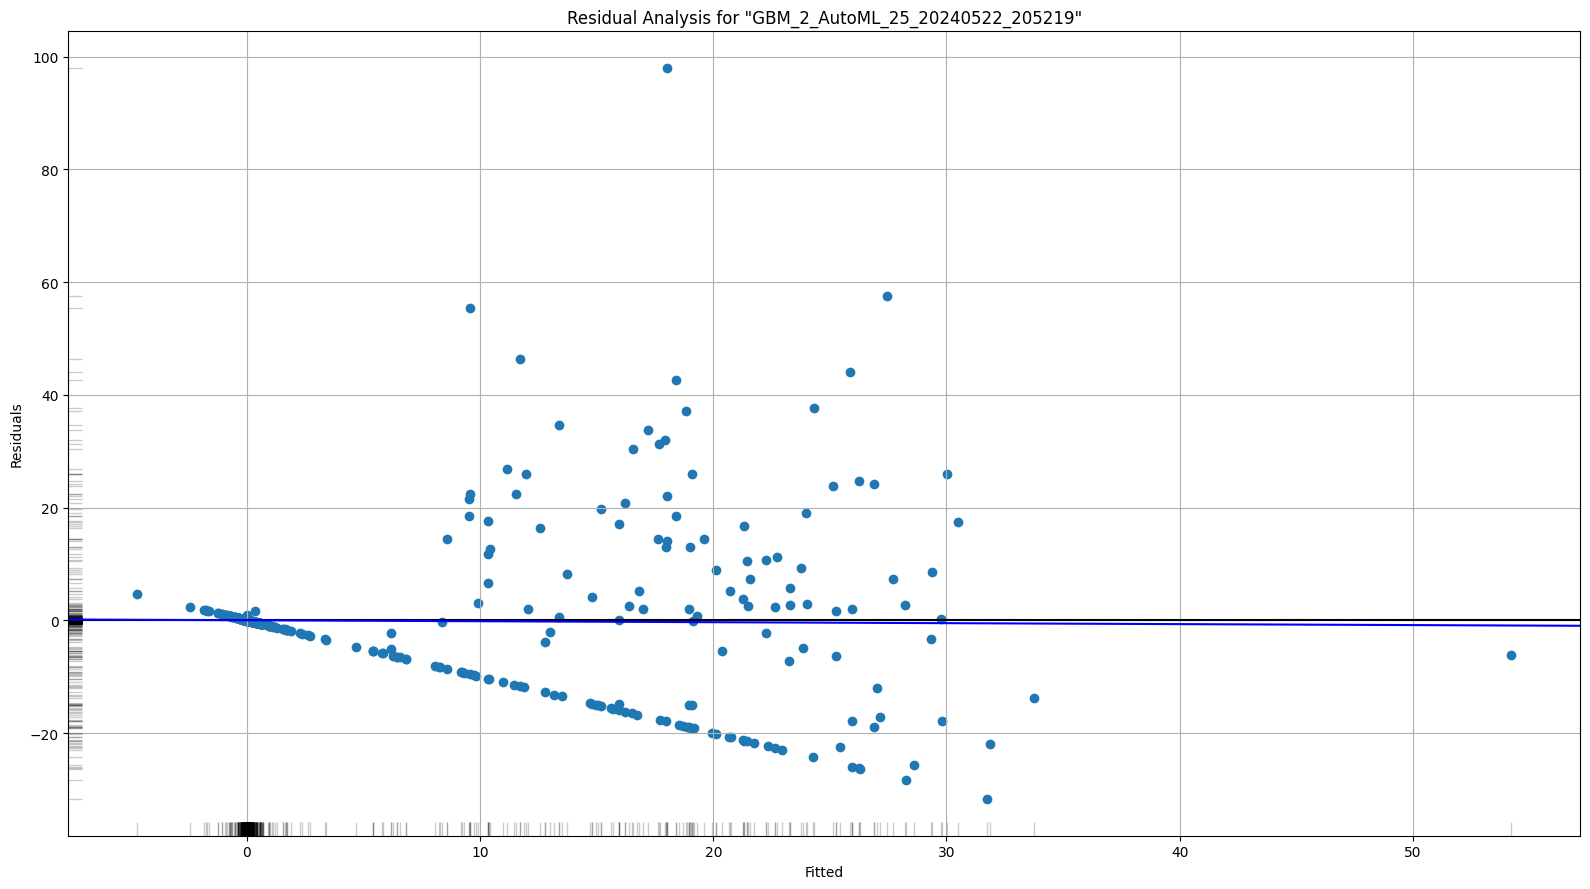

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

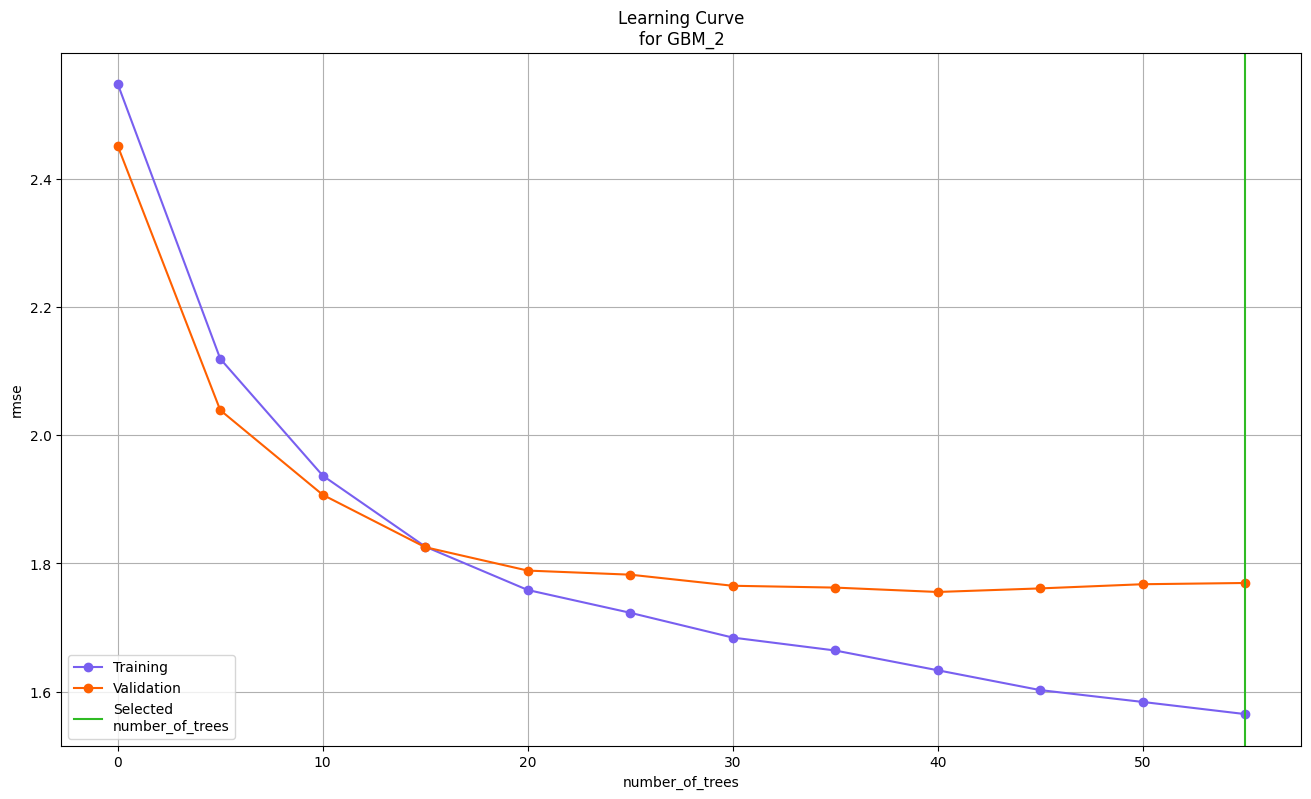

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

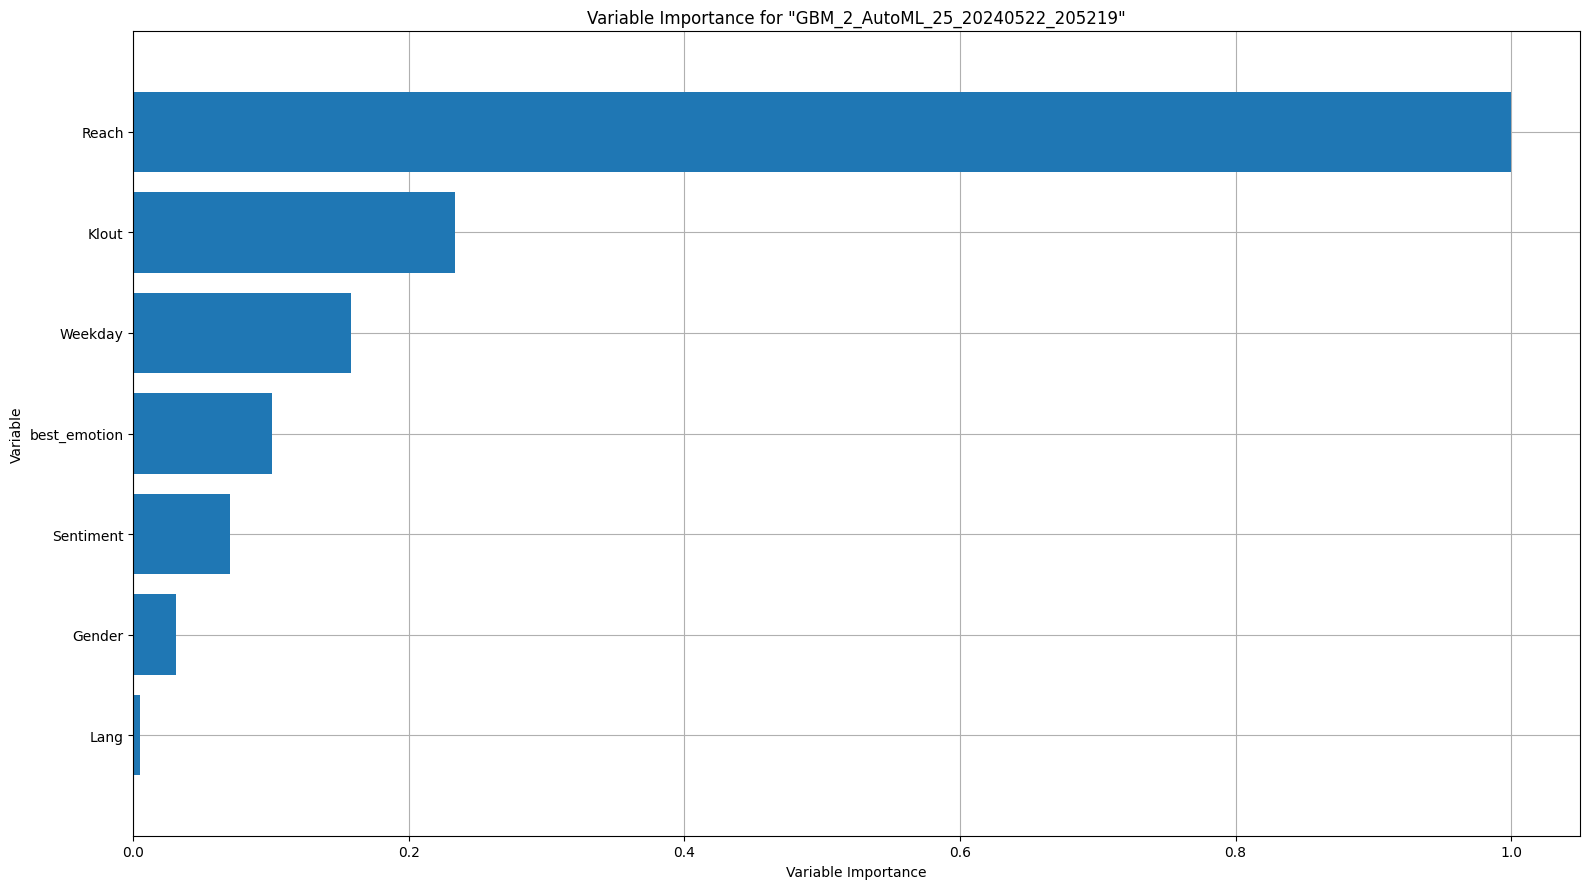

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

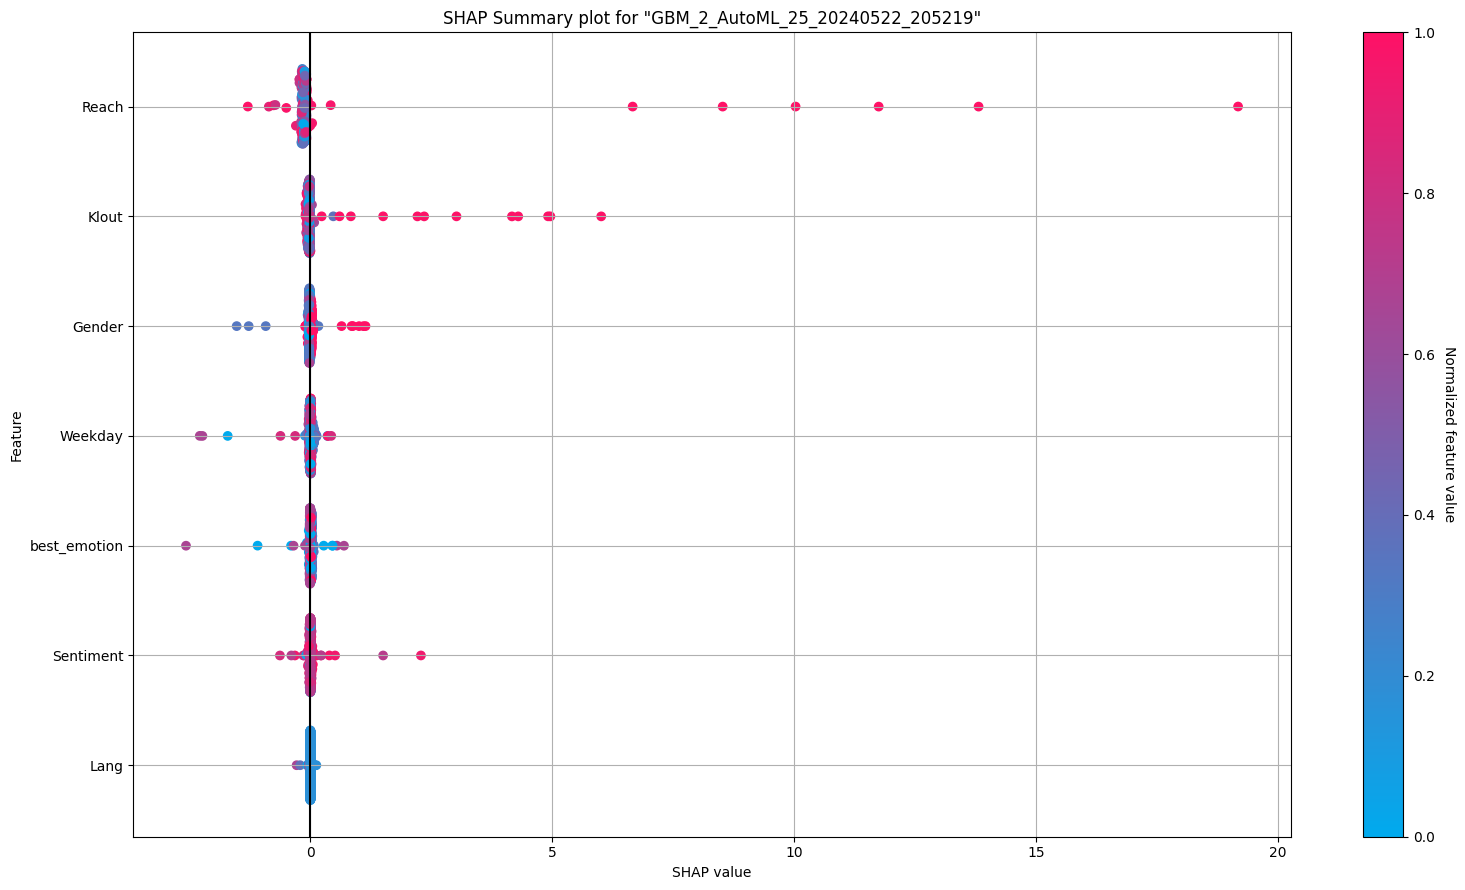

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

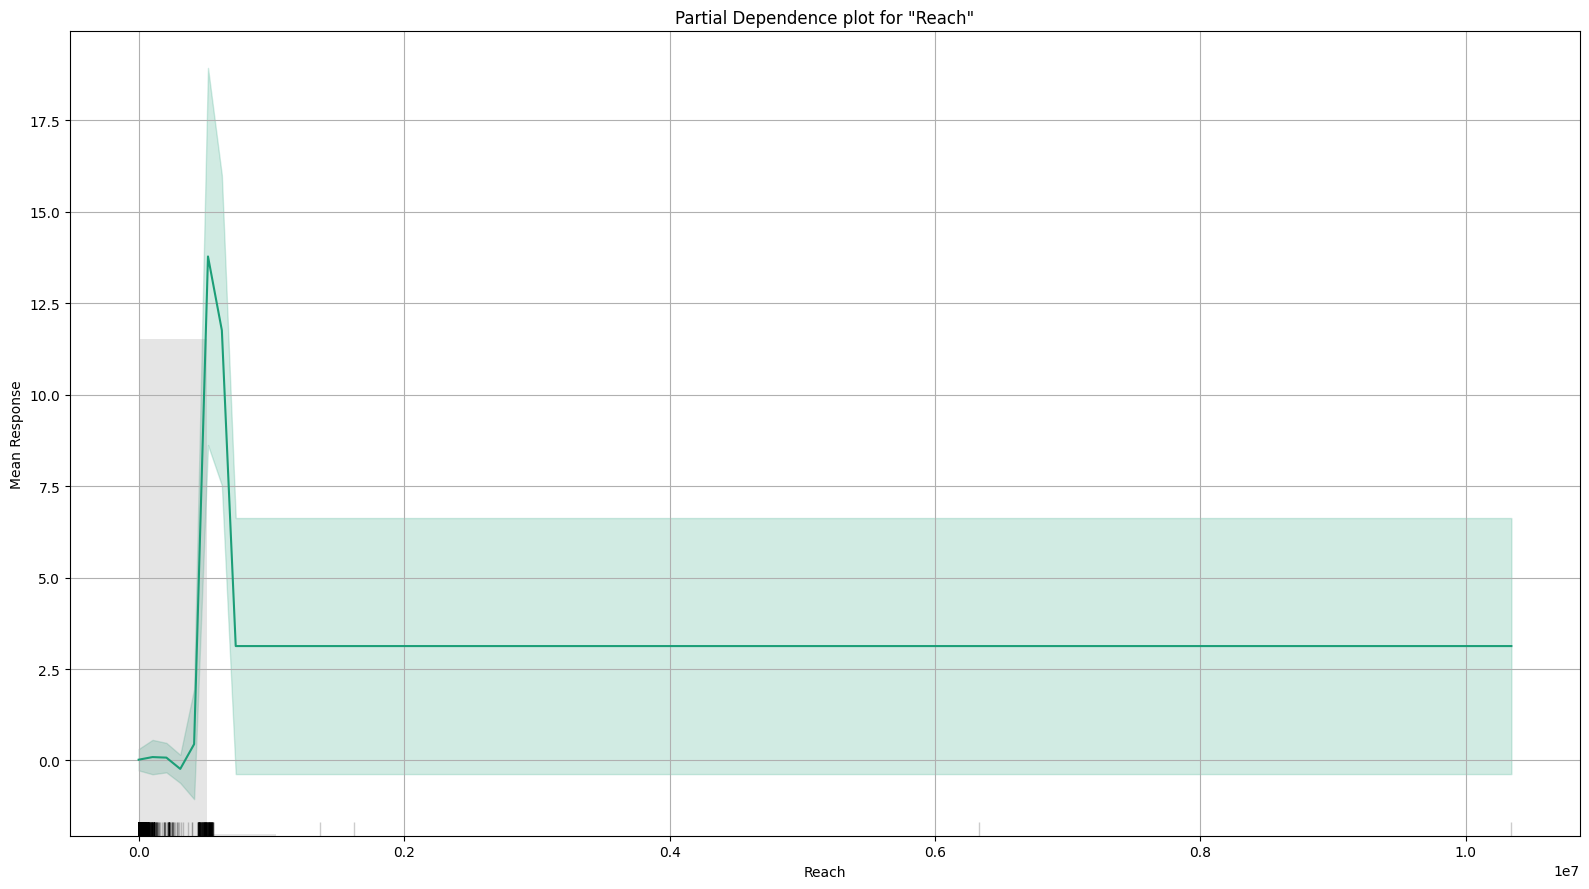

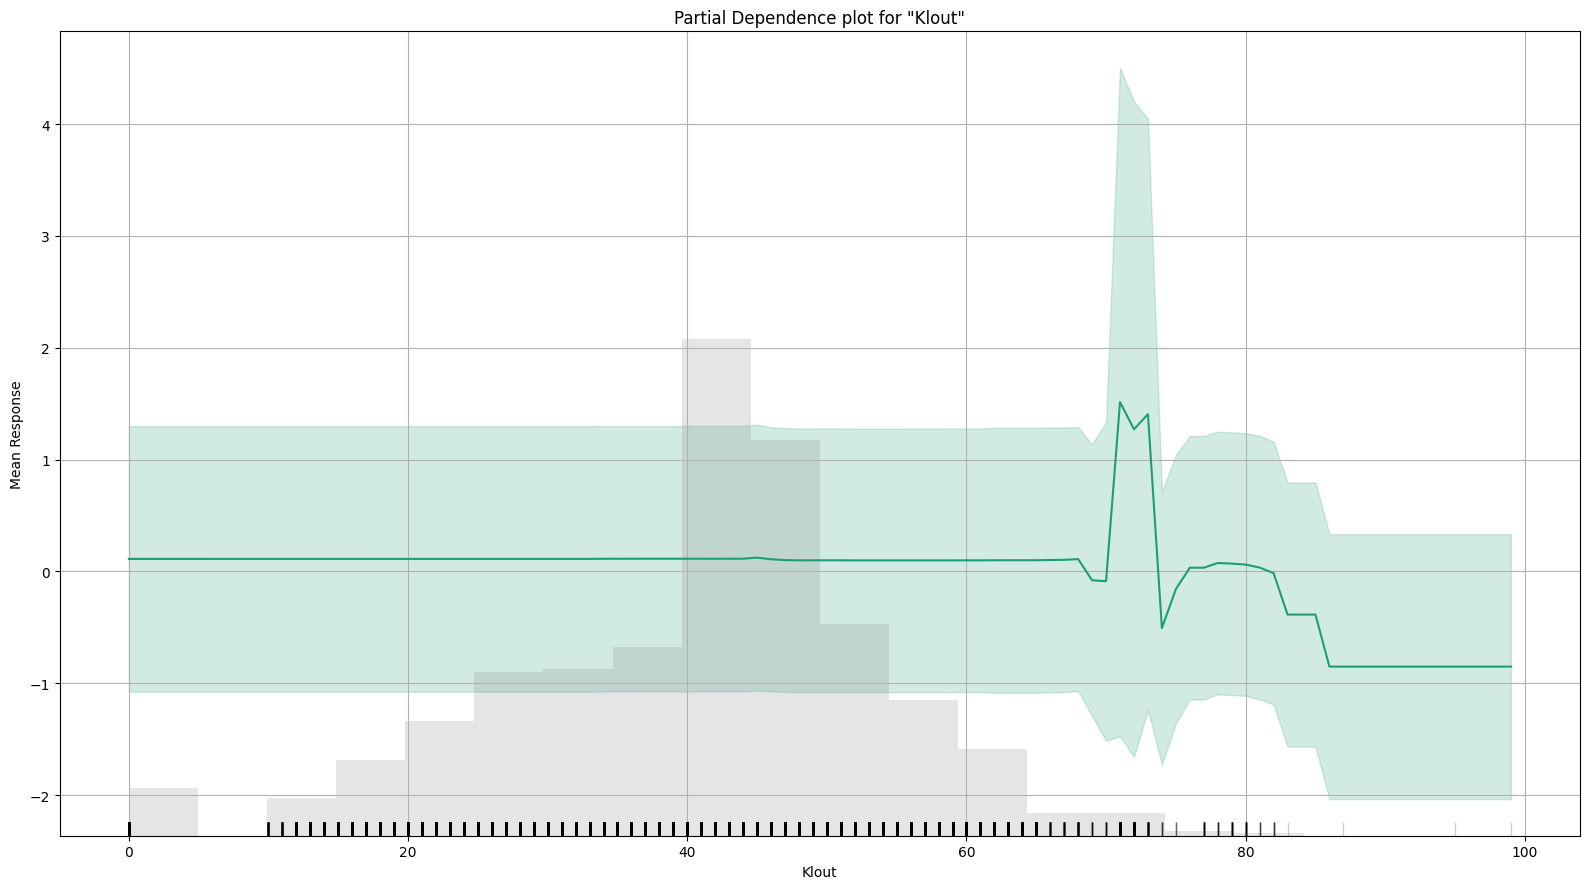

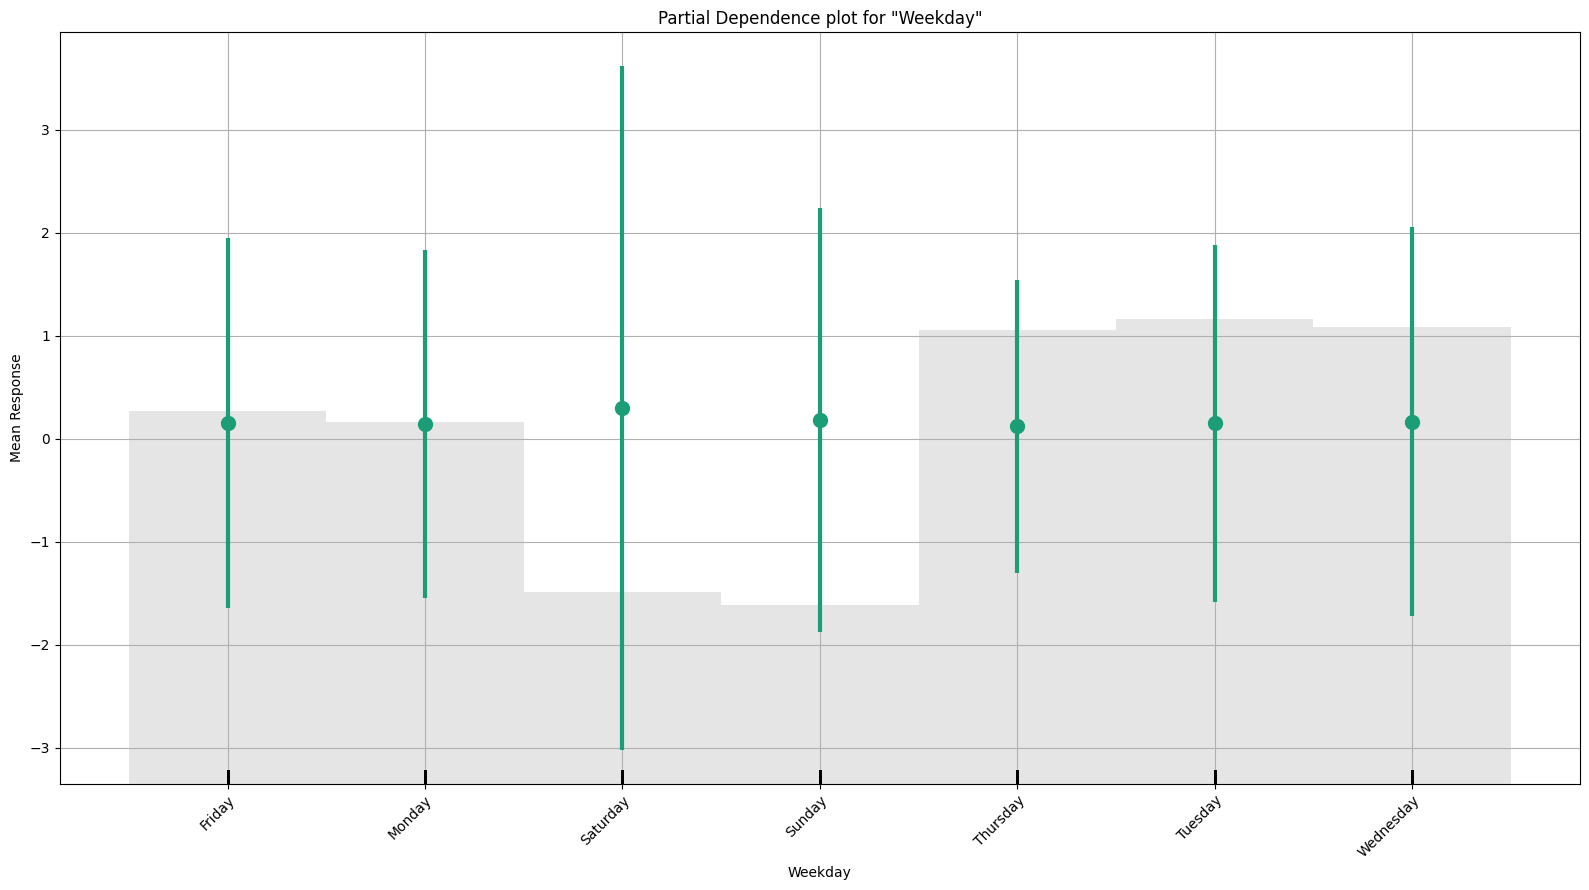

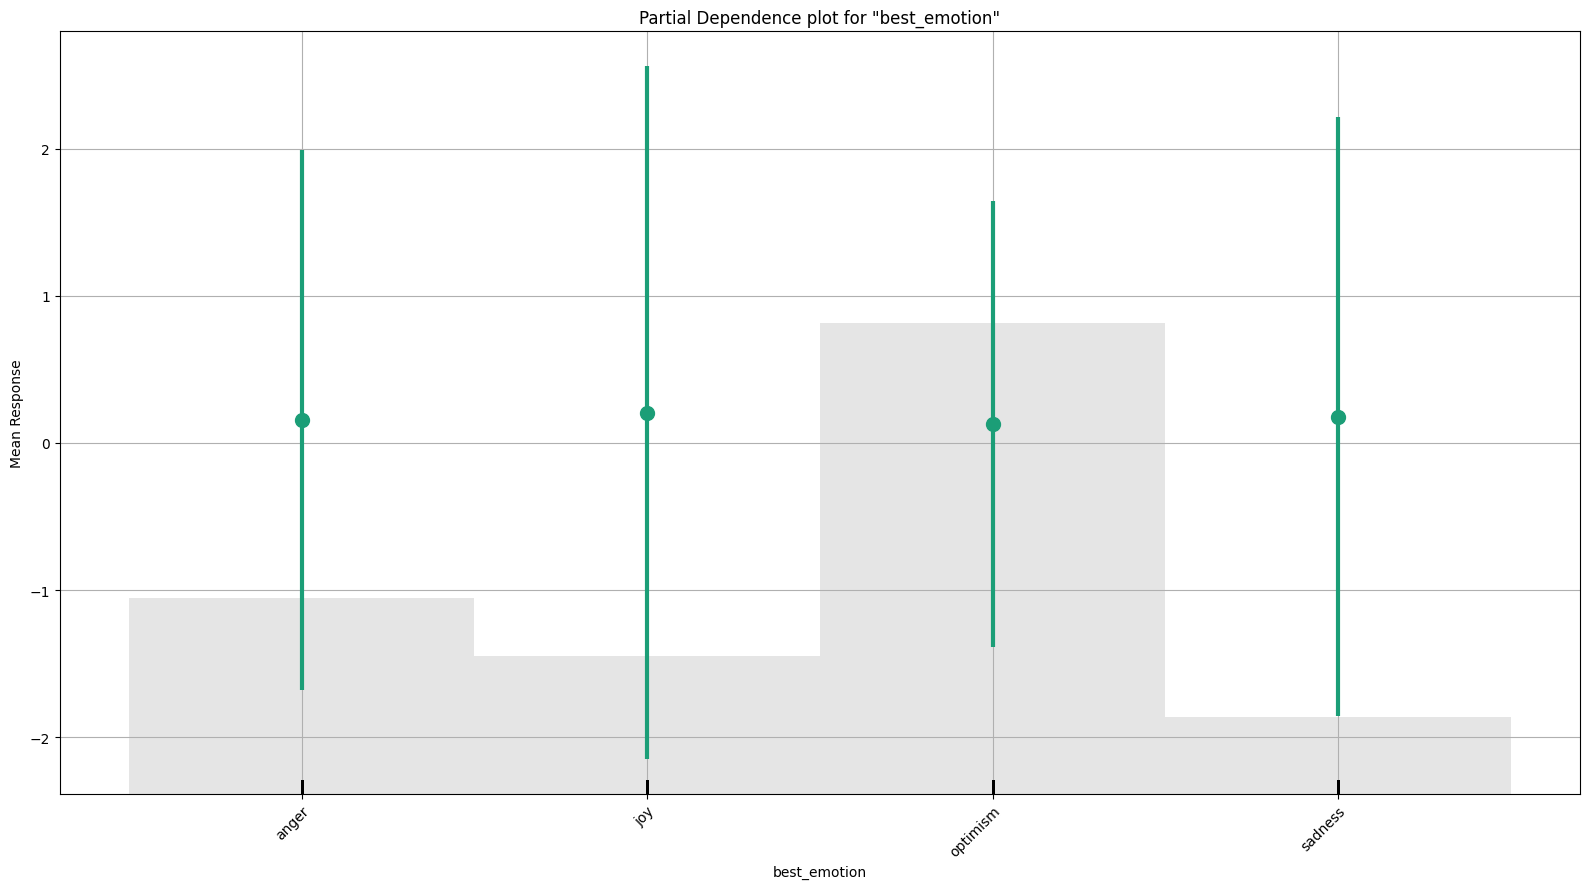

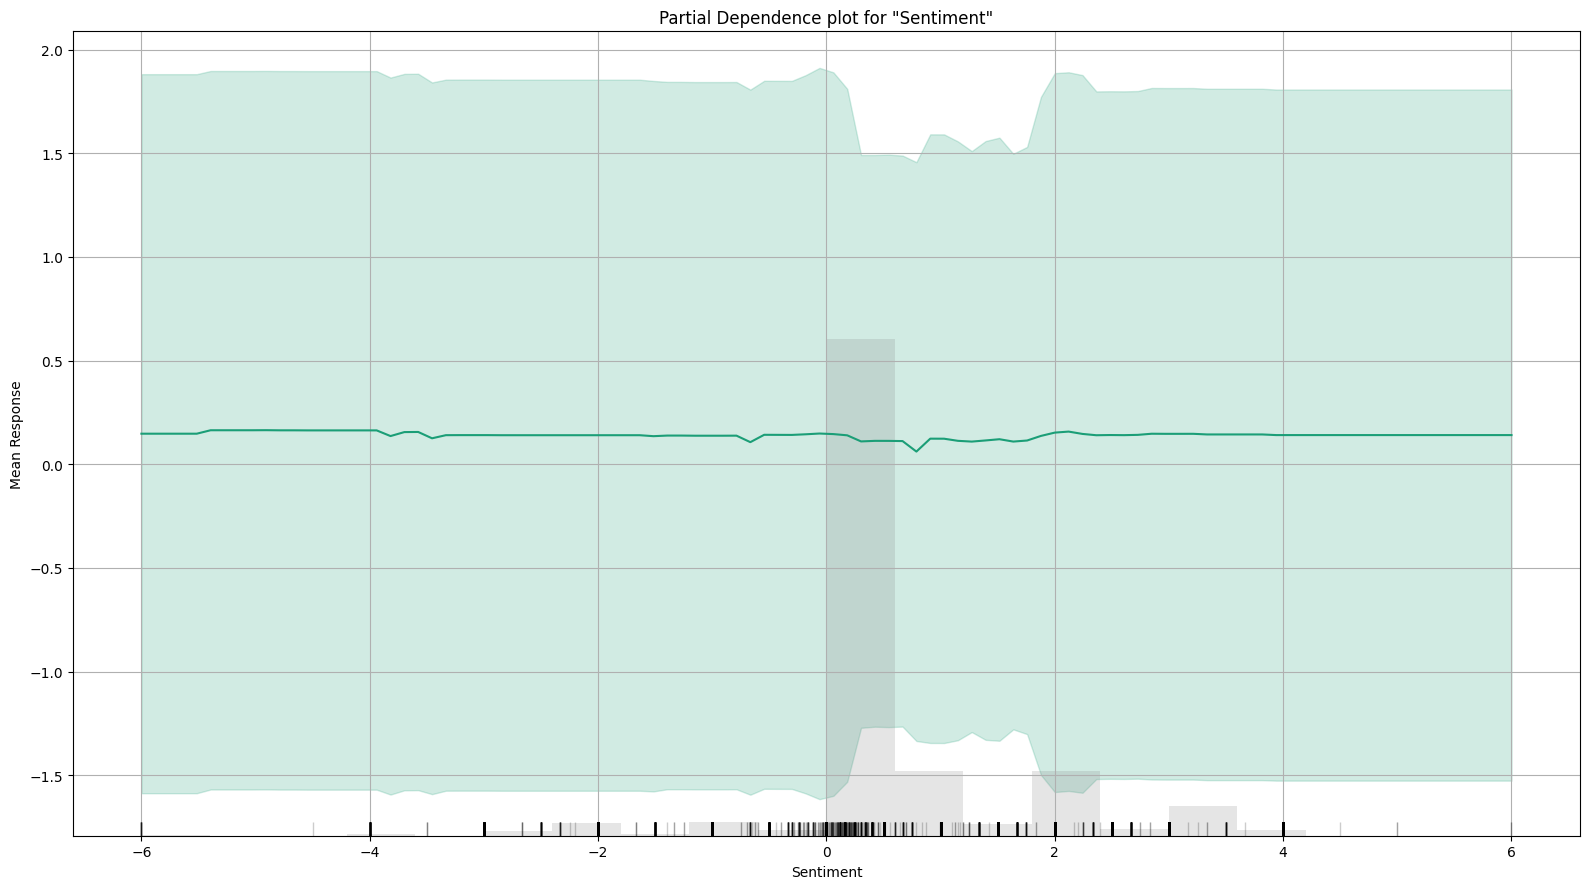

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

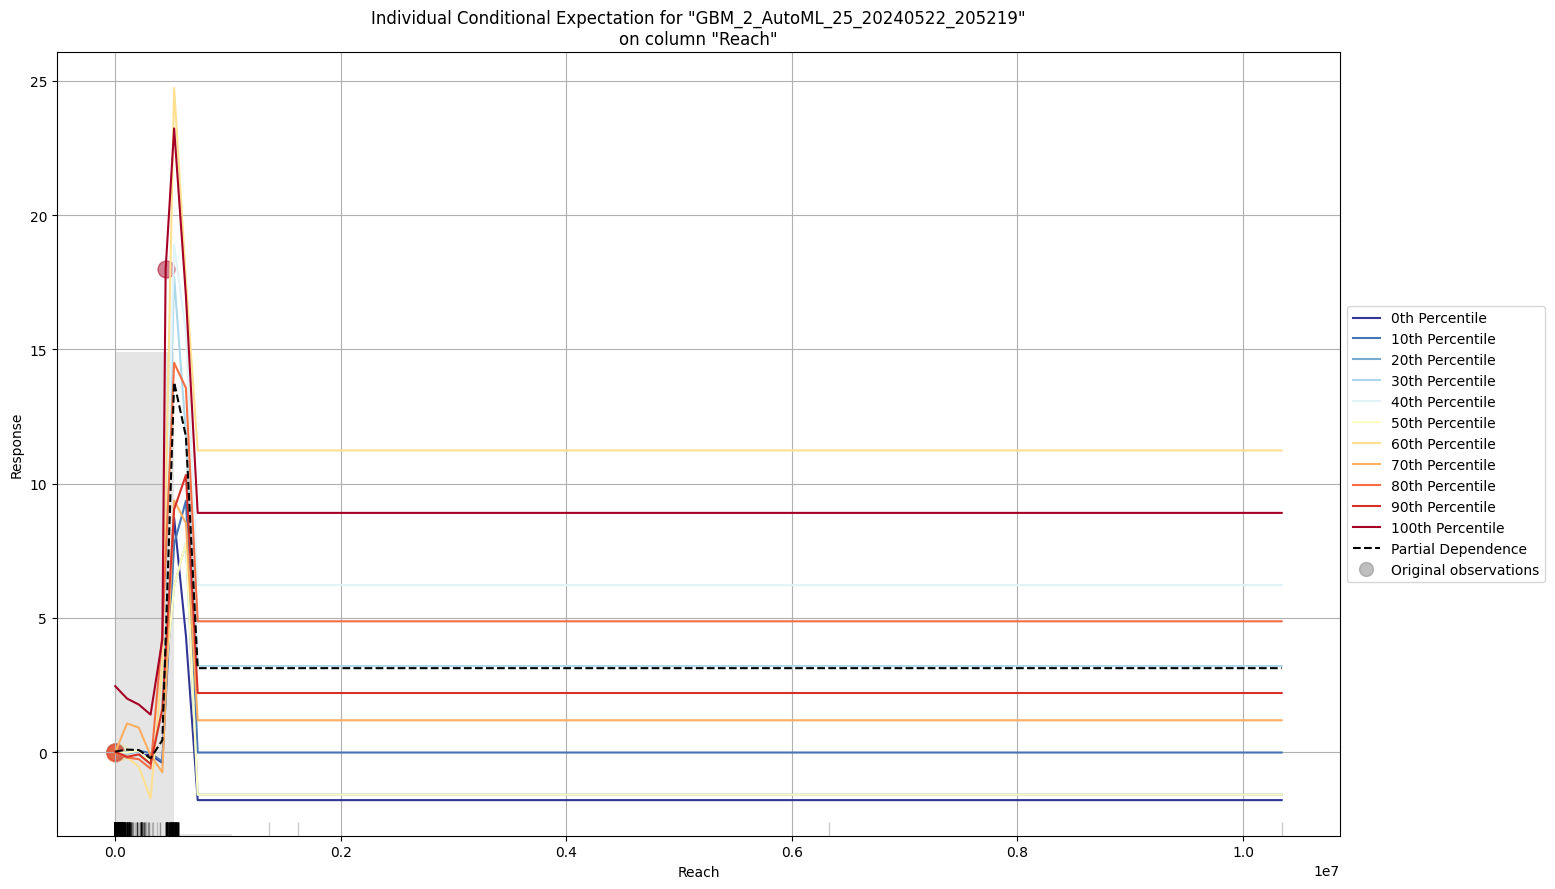

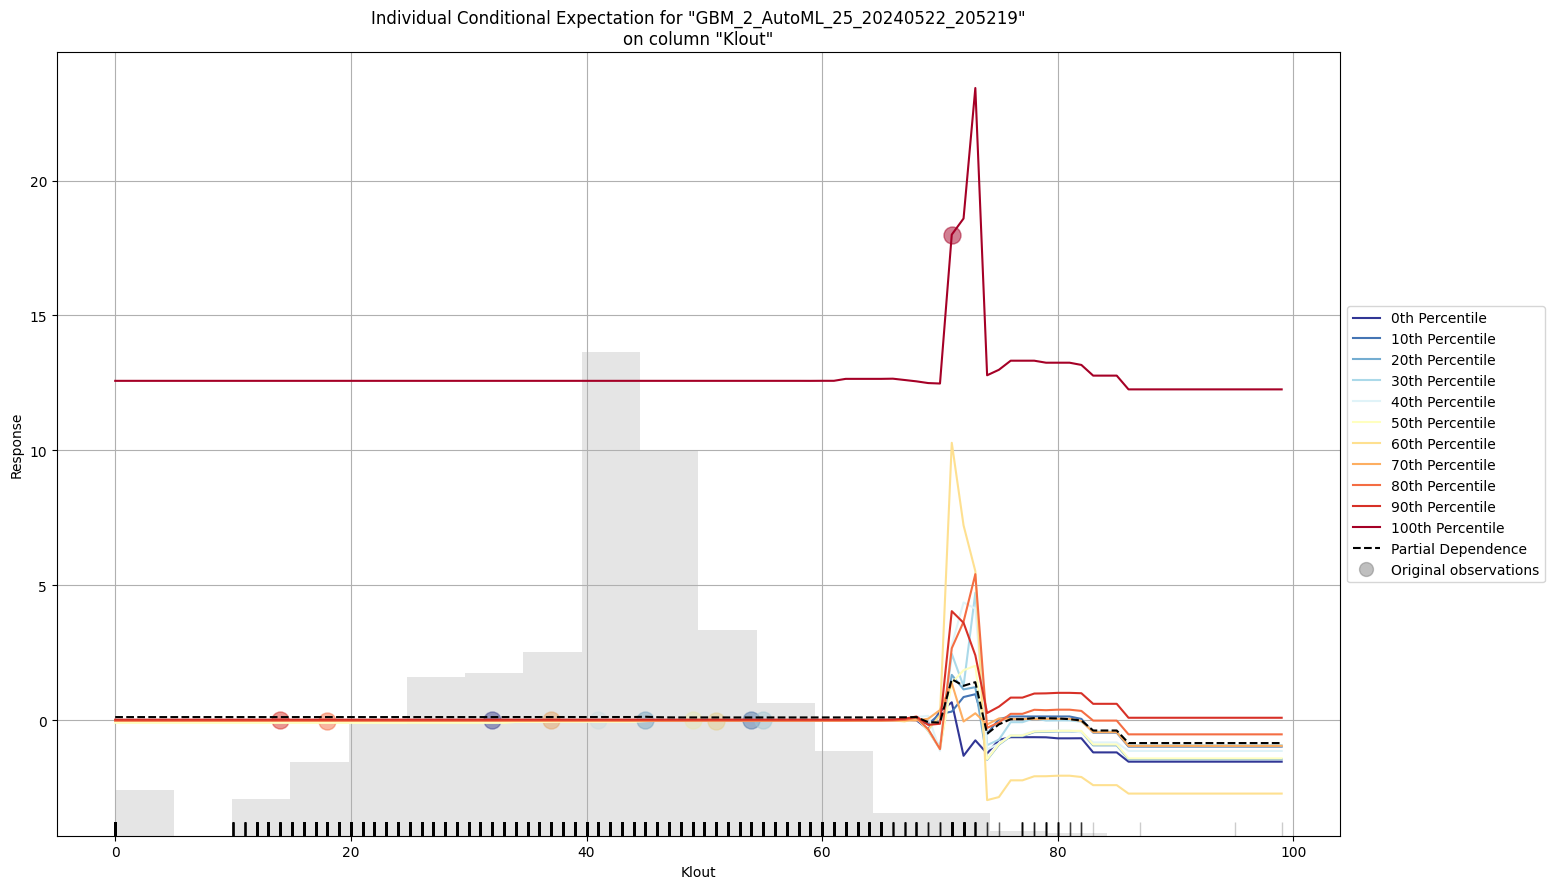

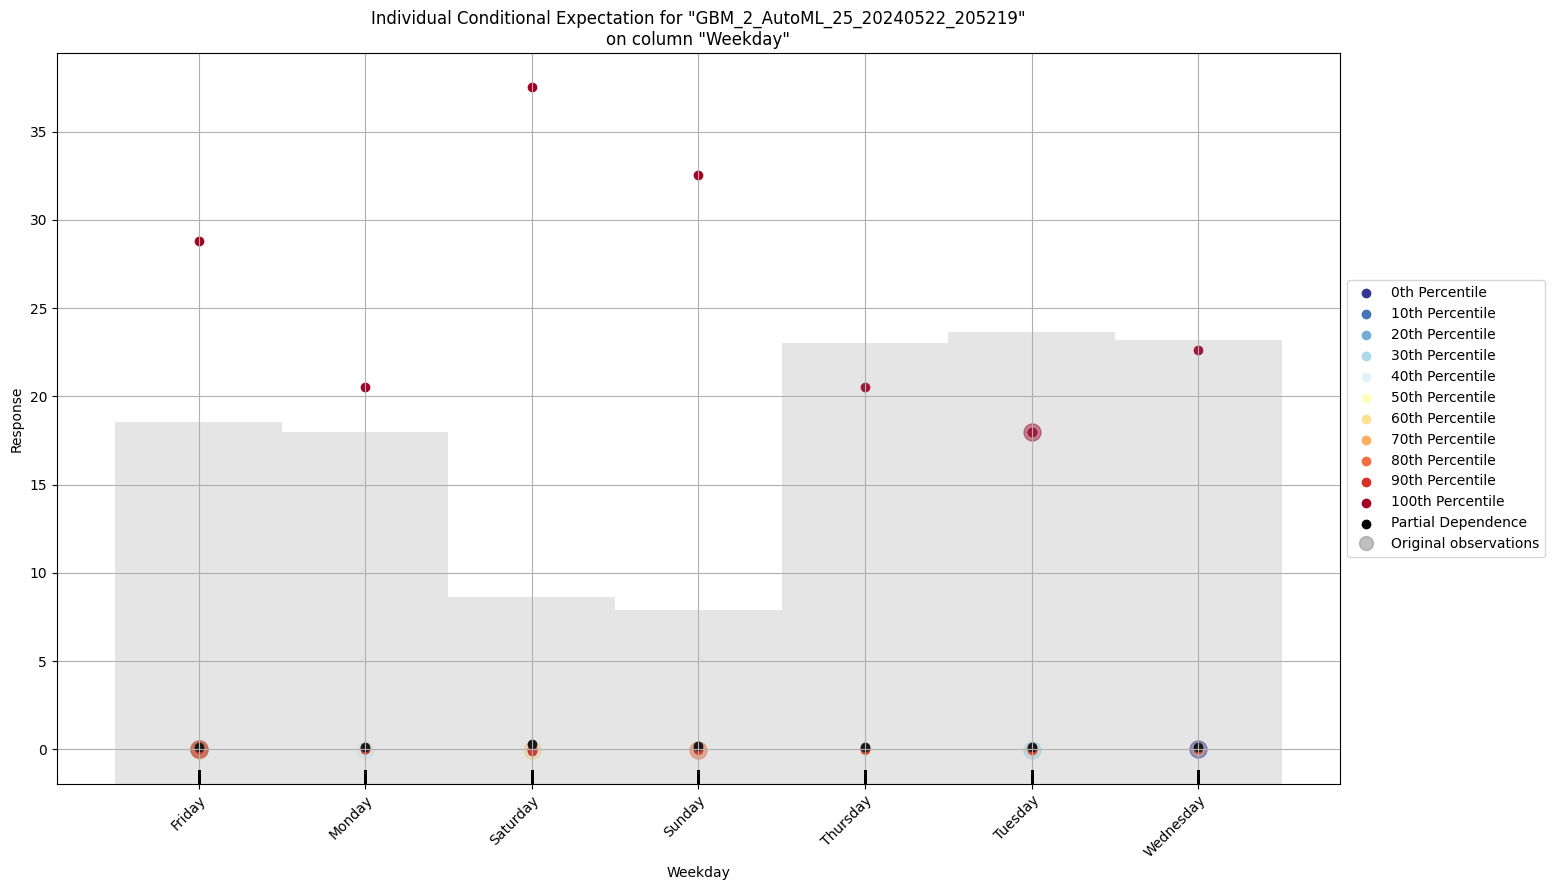

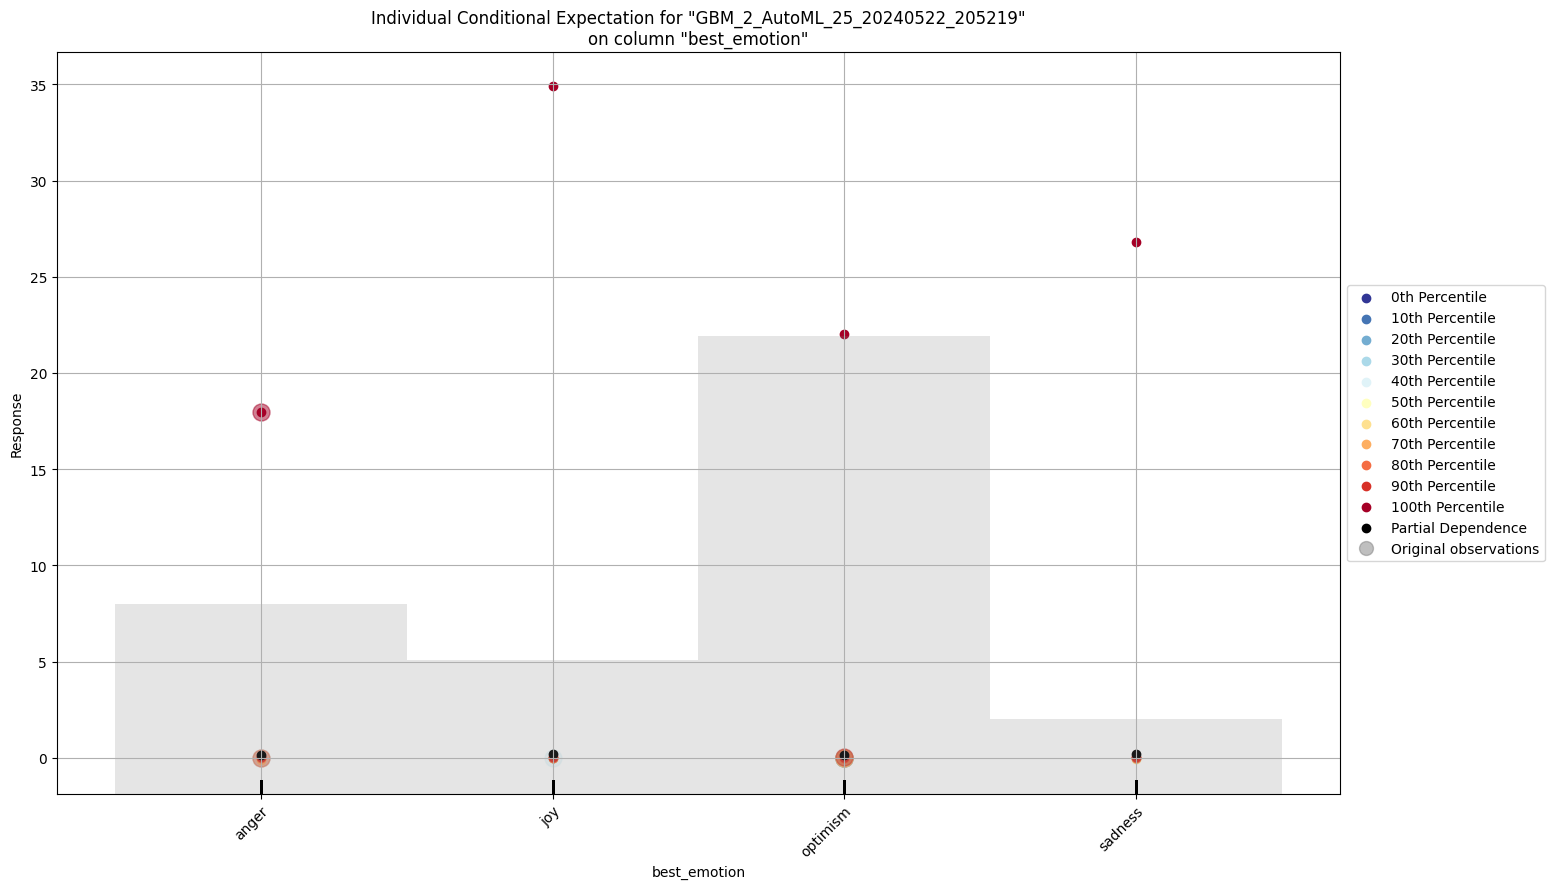

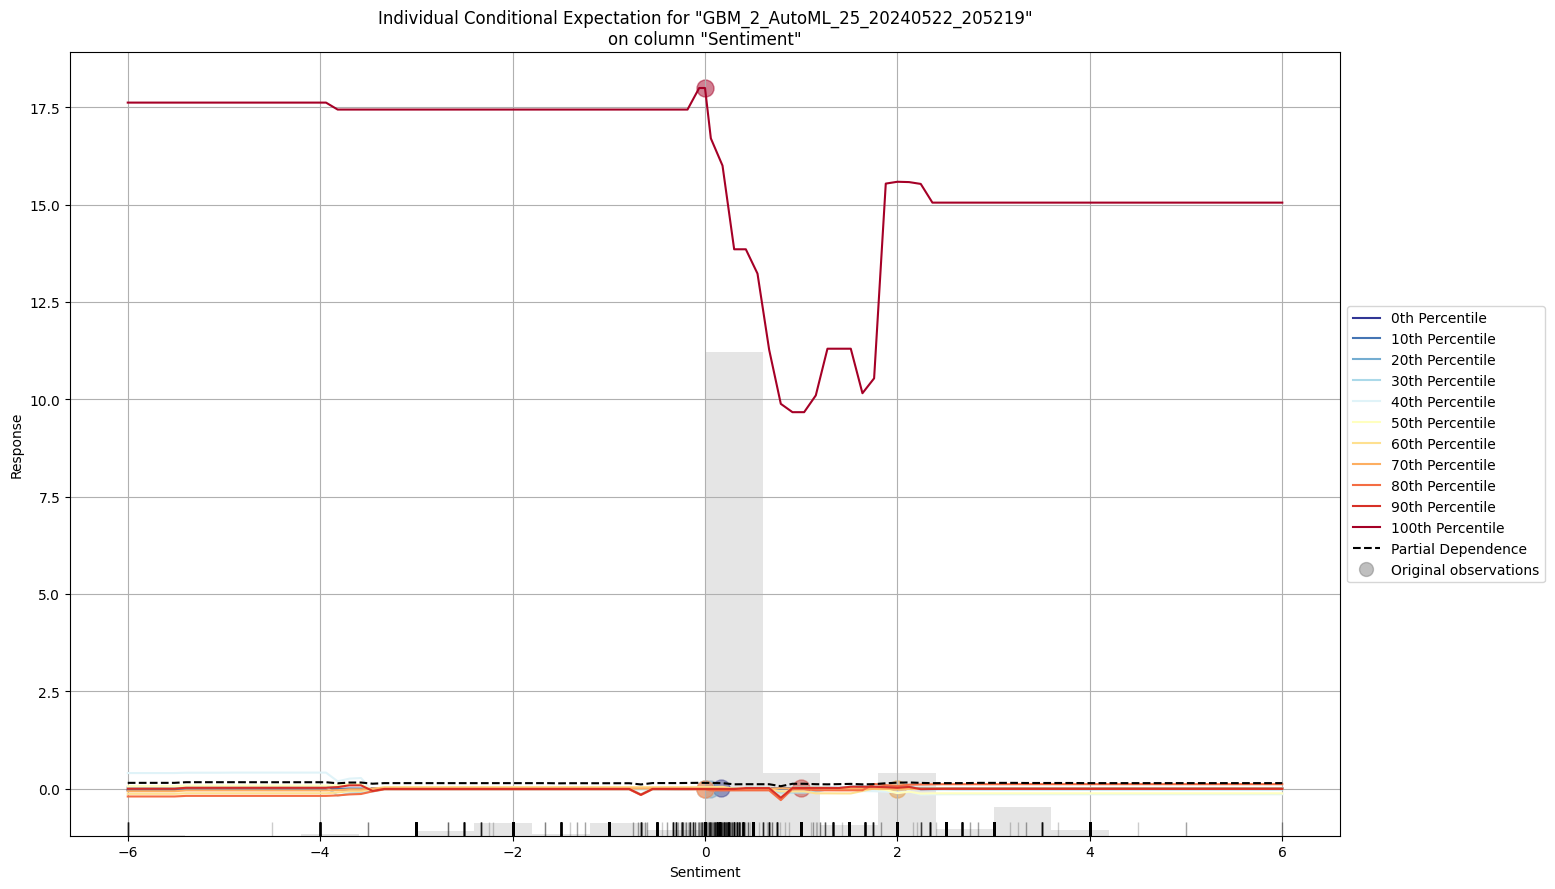

In [43]:
%matplotlib inline
# model.explain for likes
best_model_likes.explain(valid,render=True)


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

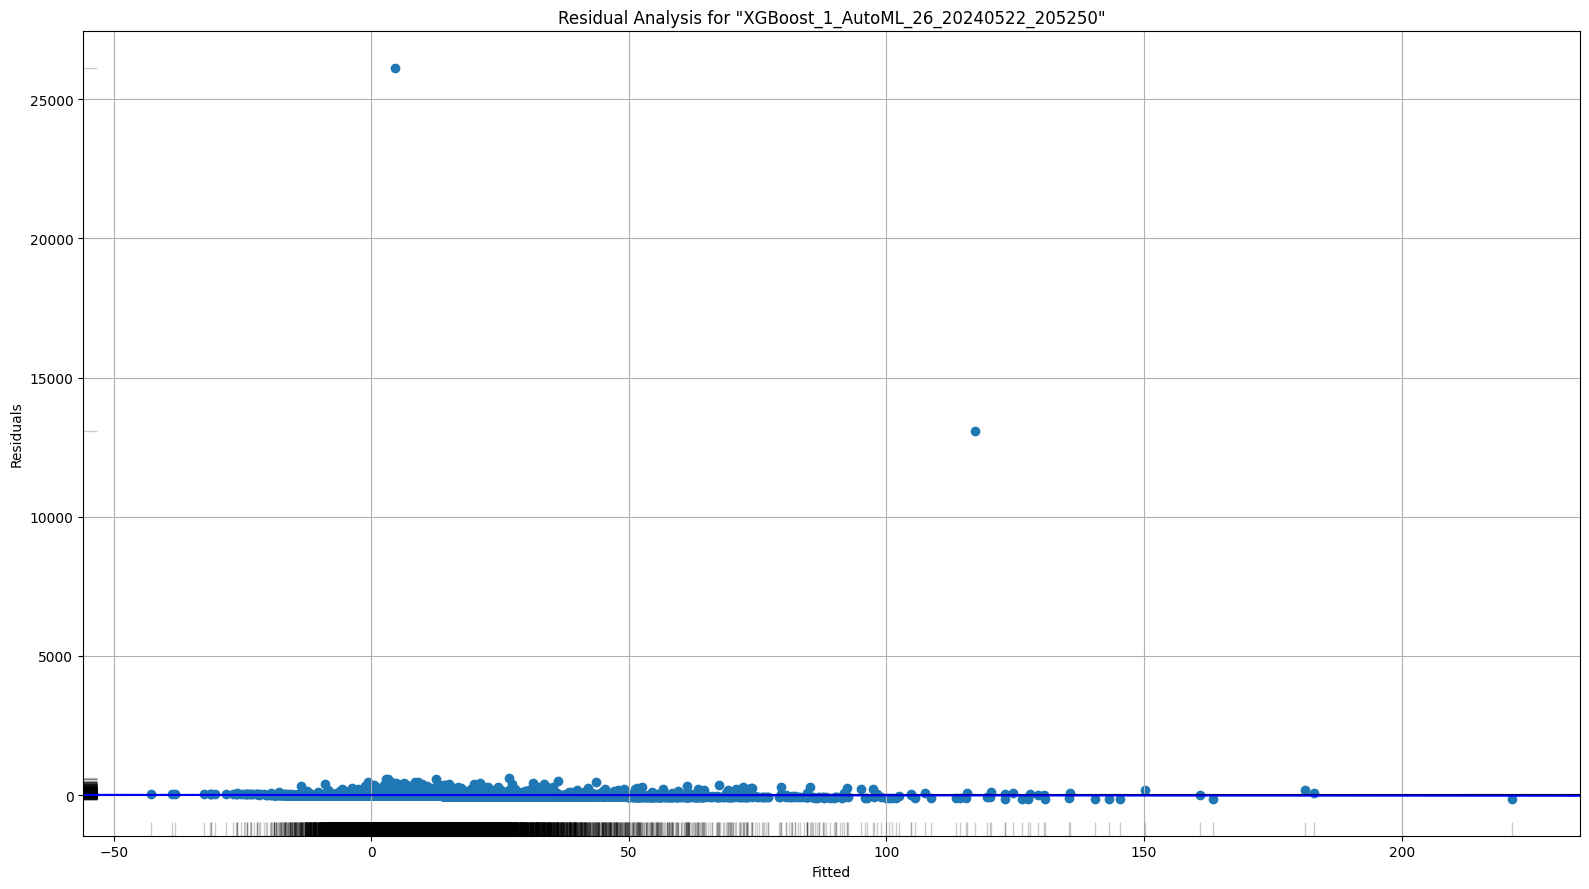

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

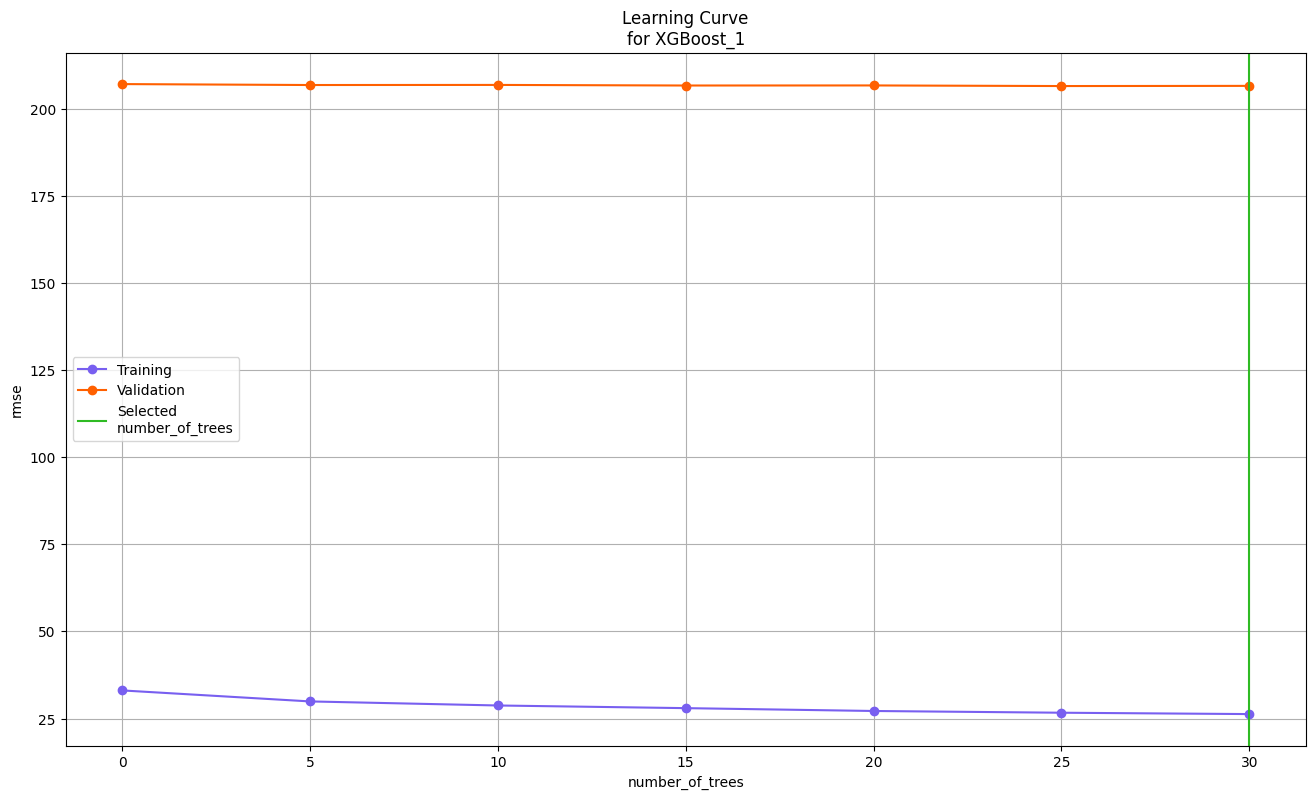

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

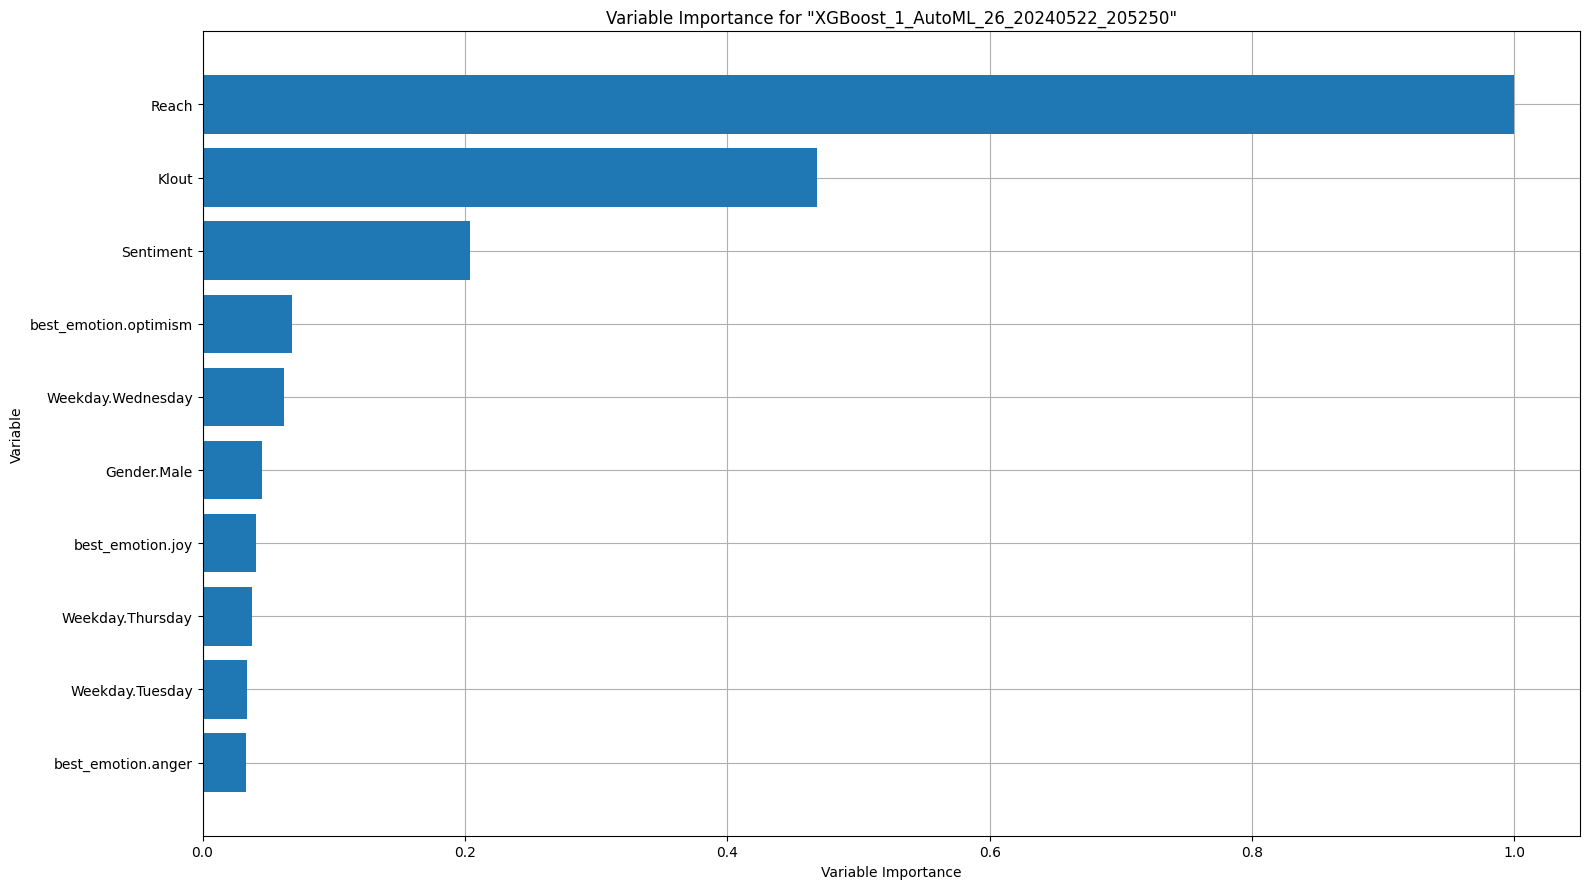

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

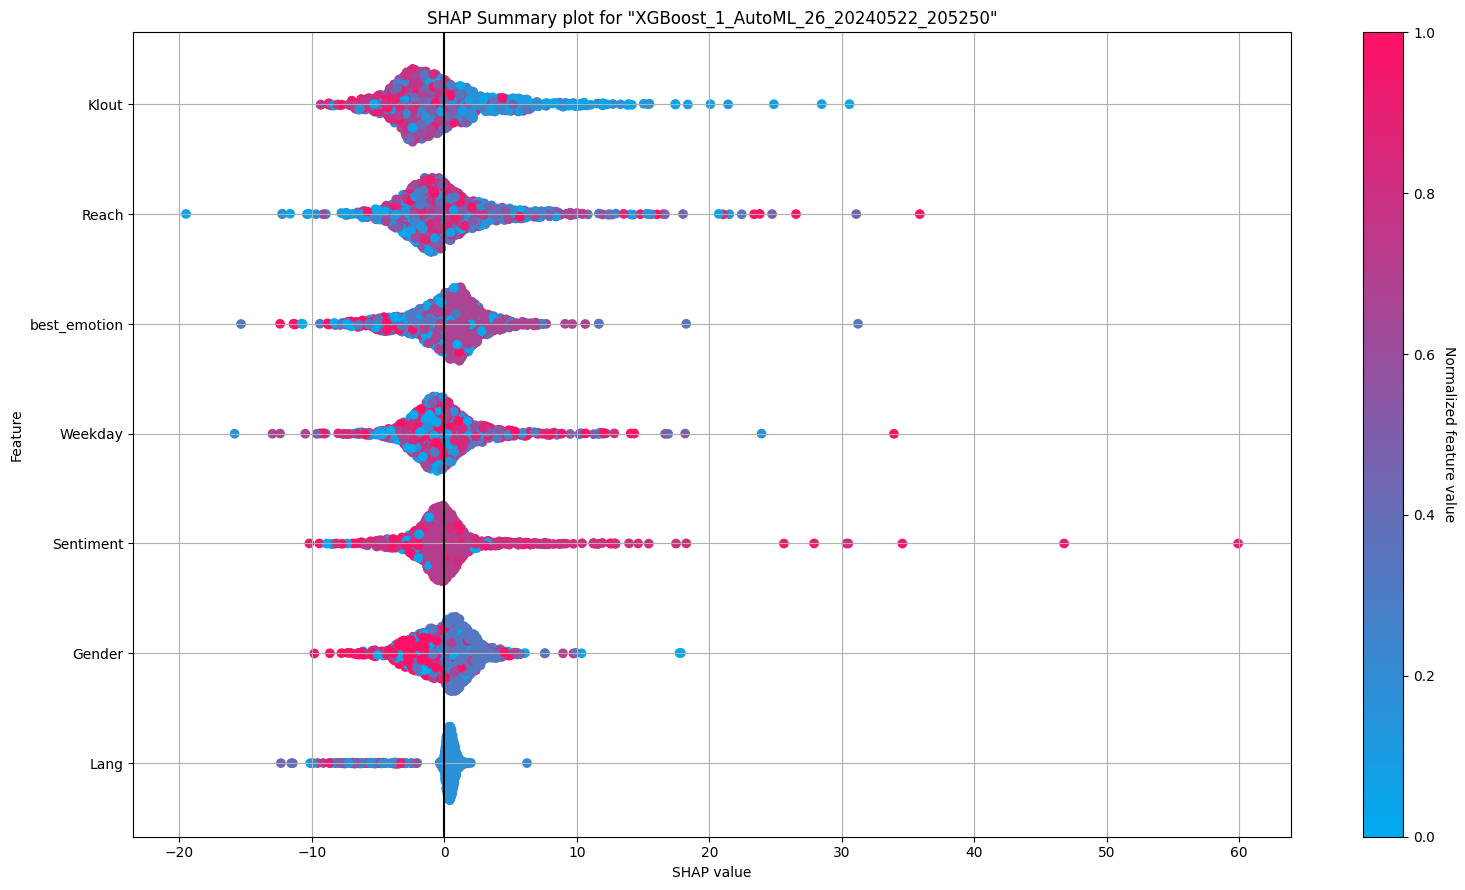

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

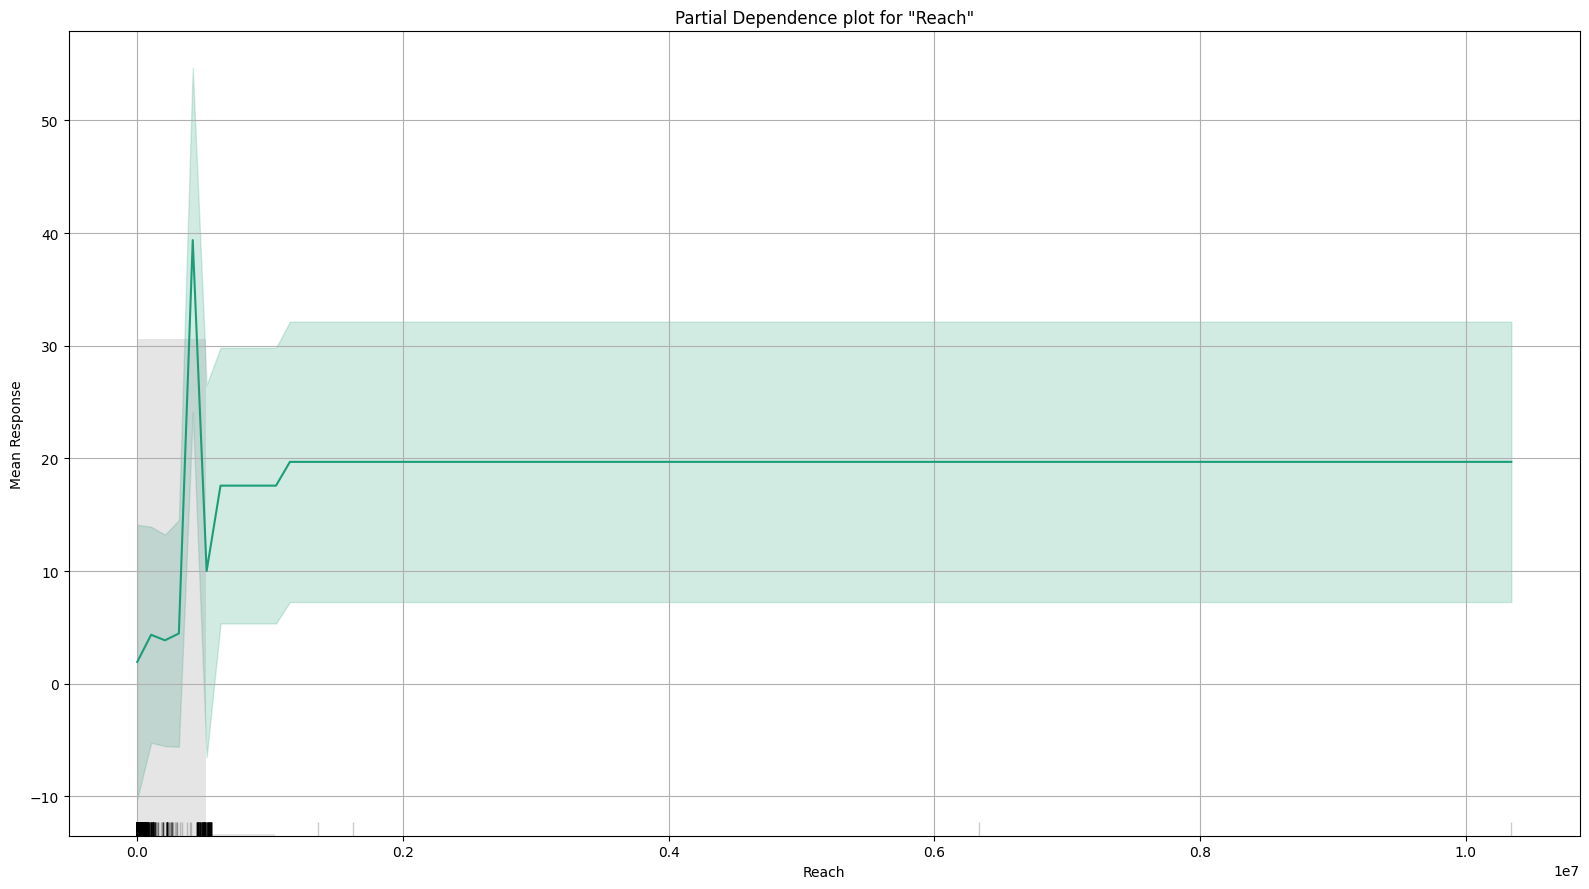

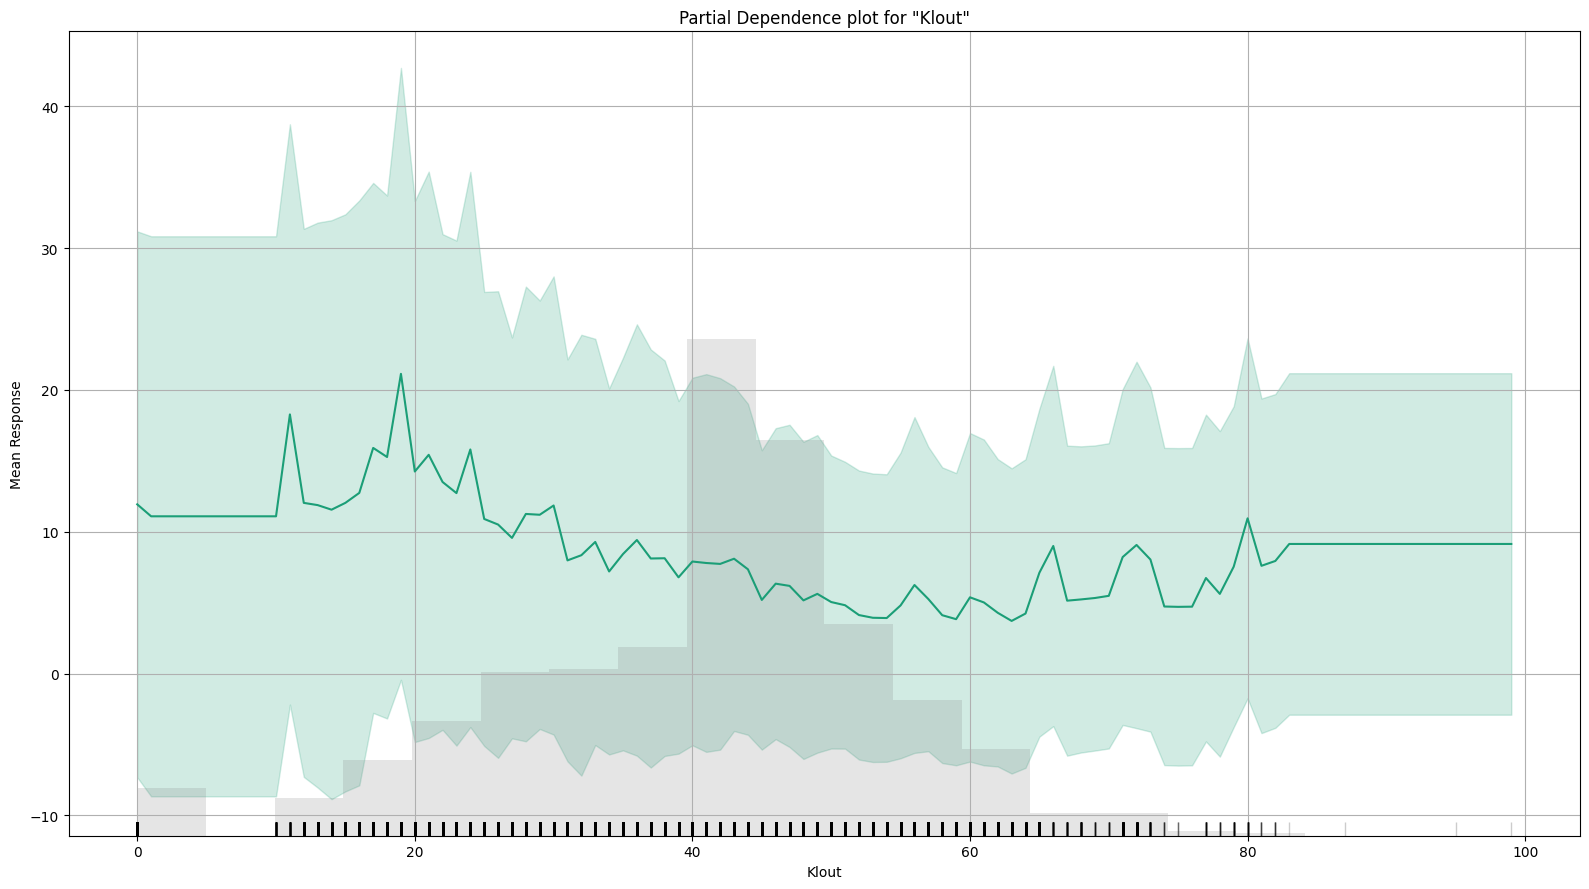

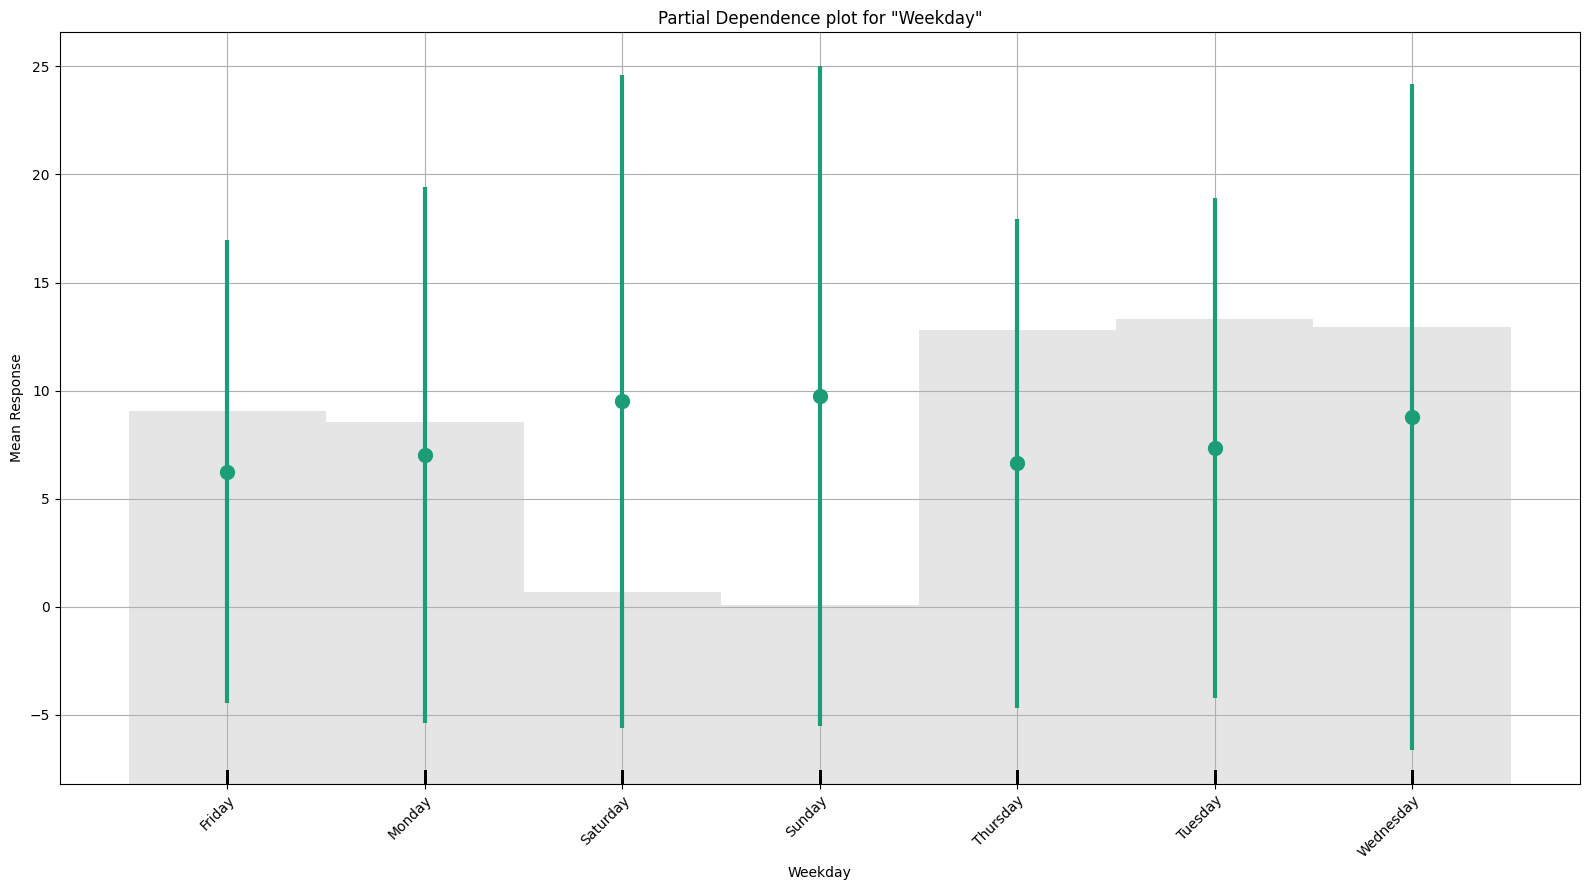

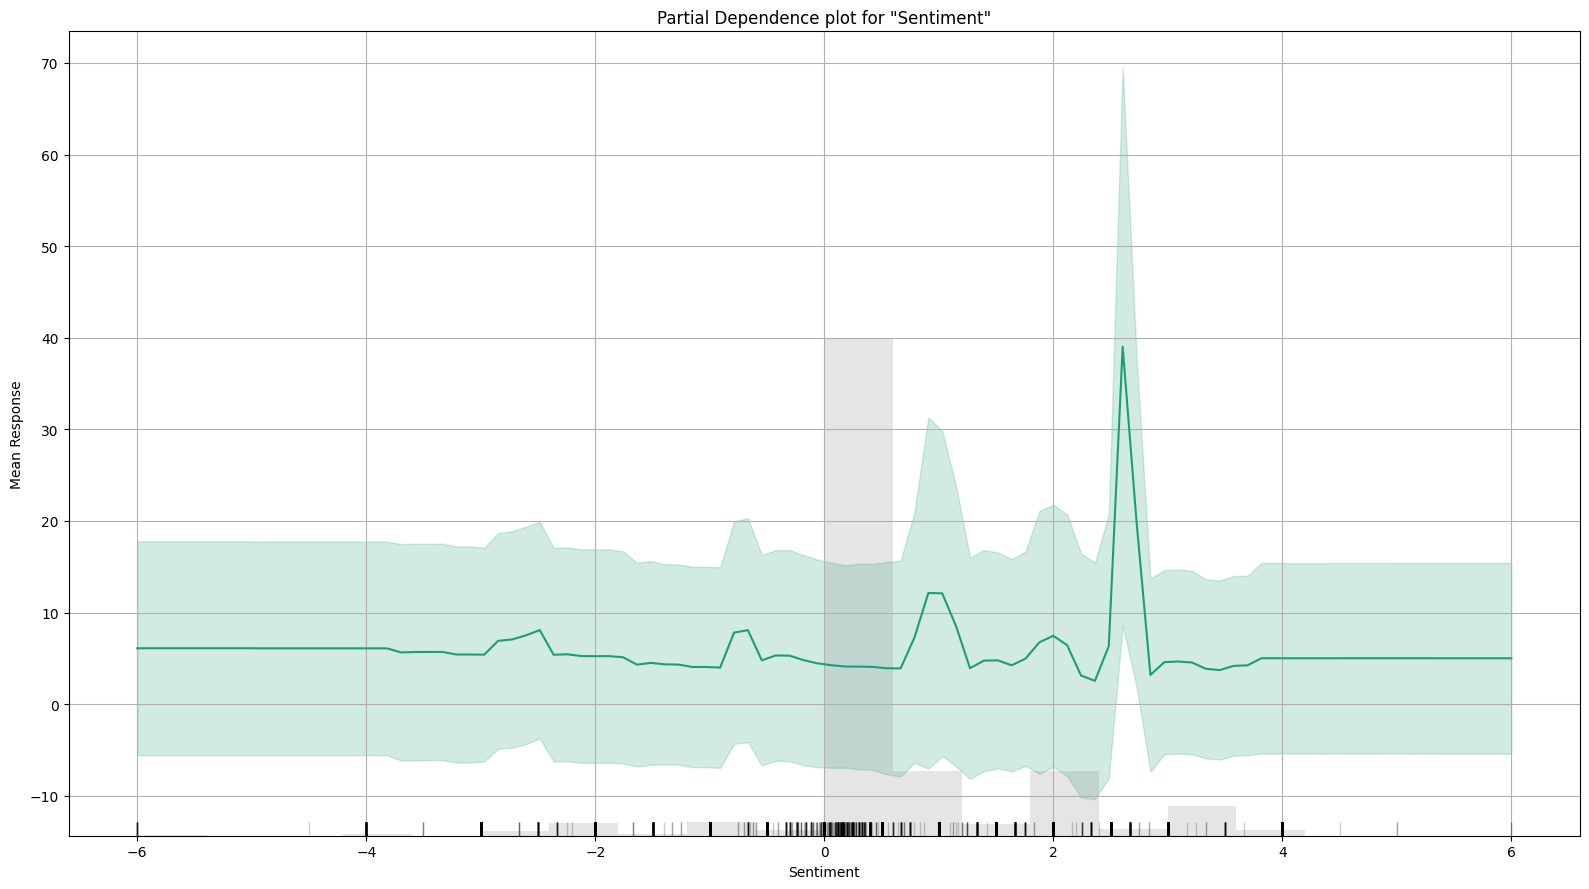

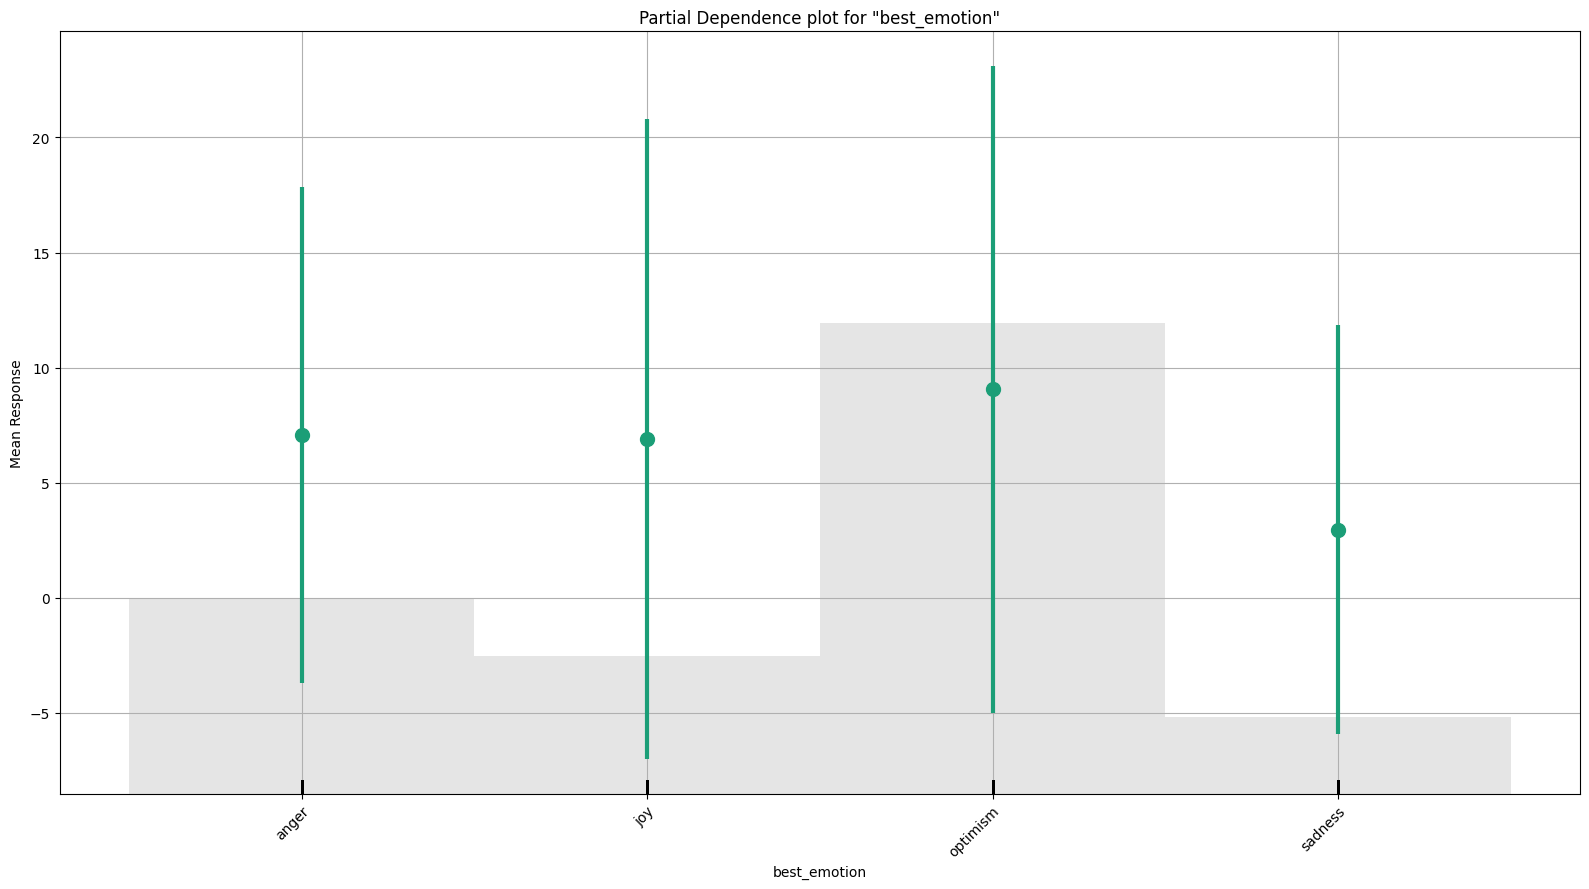

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

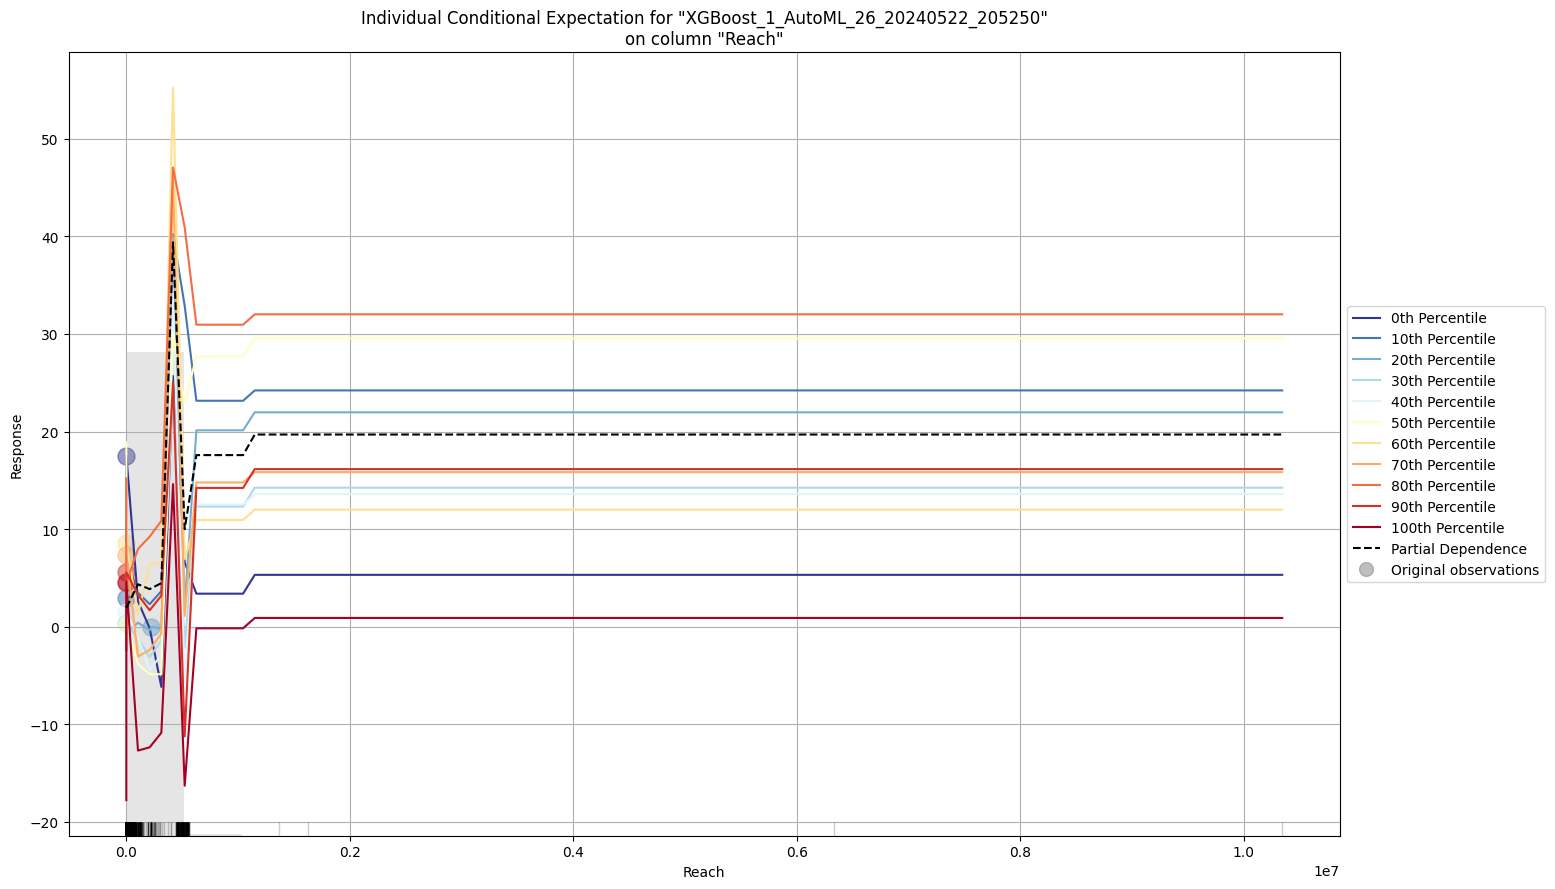

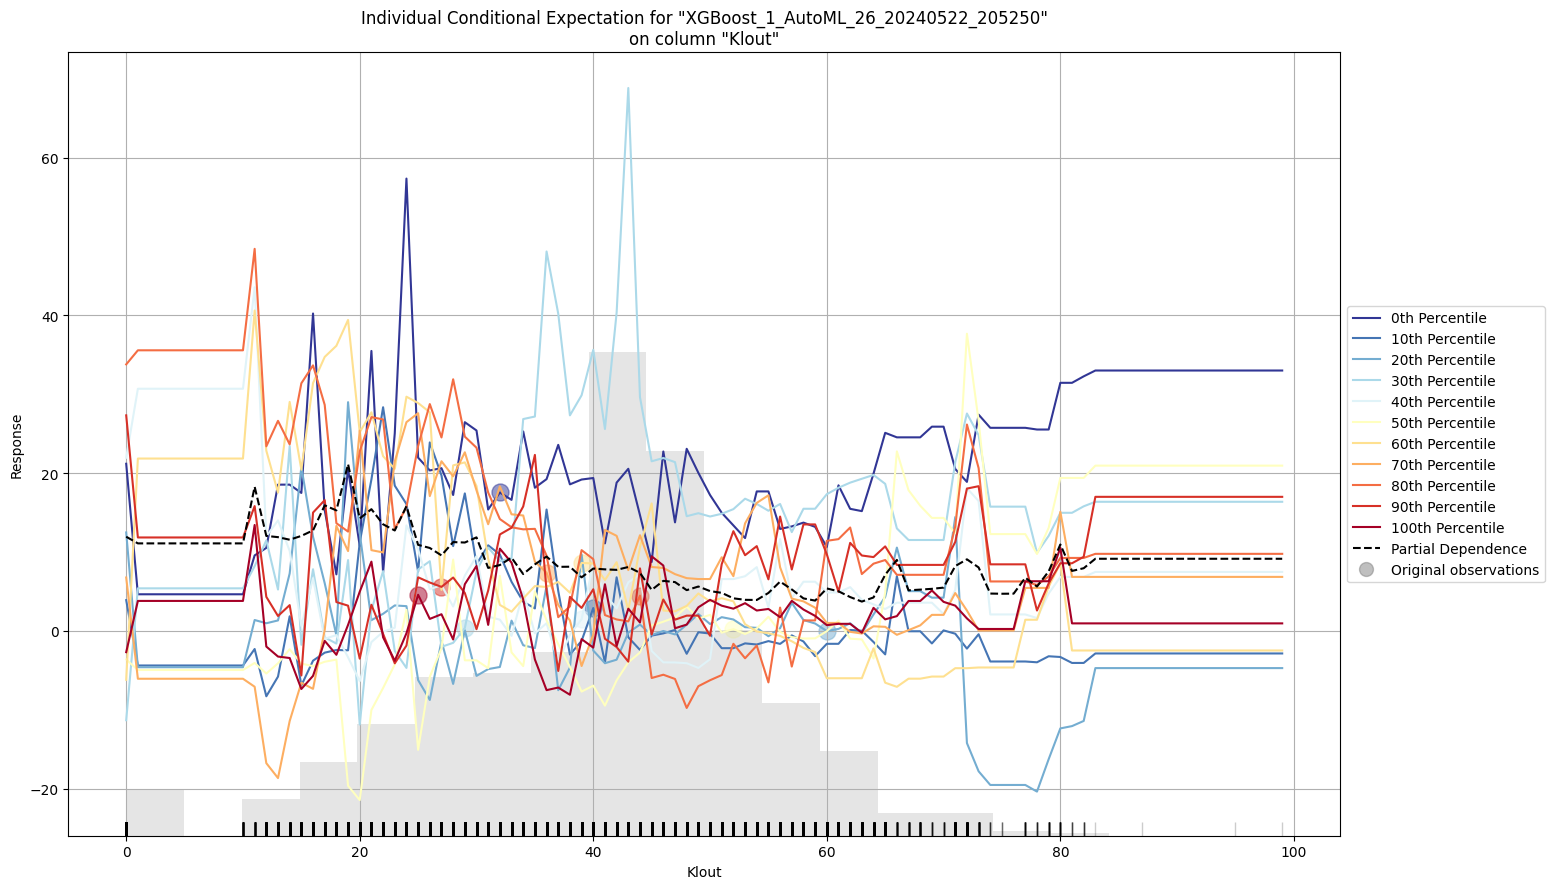

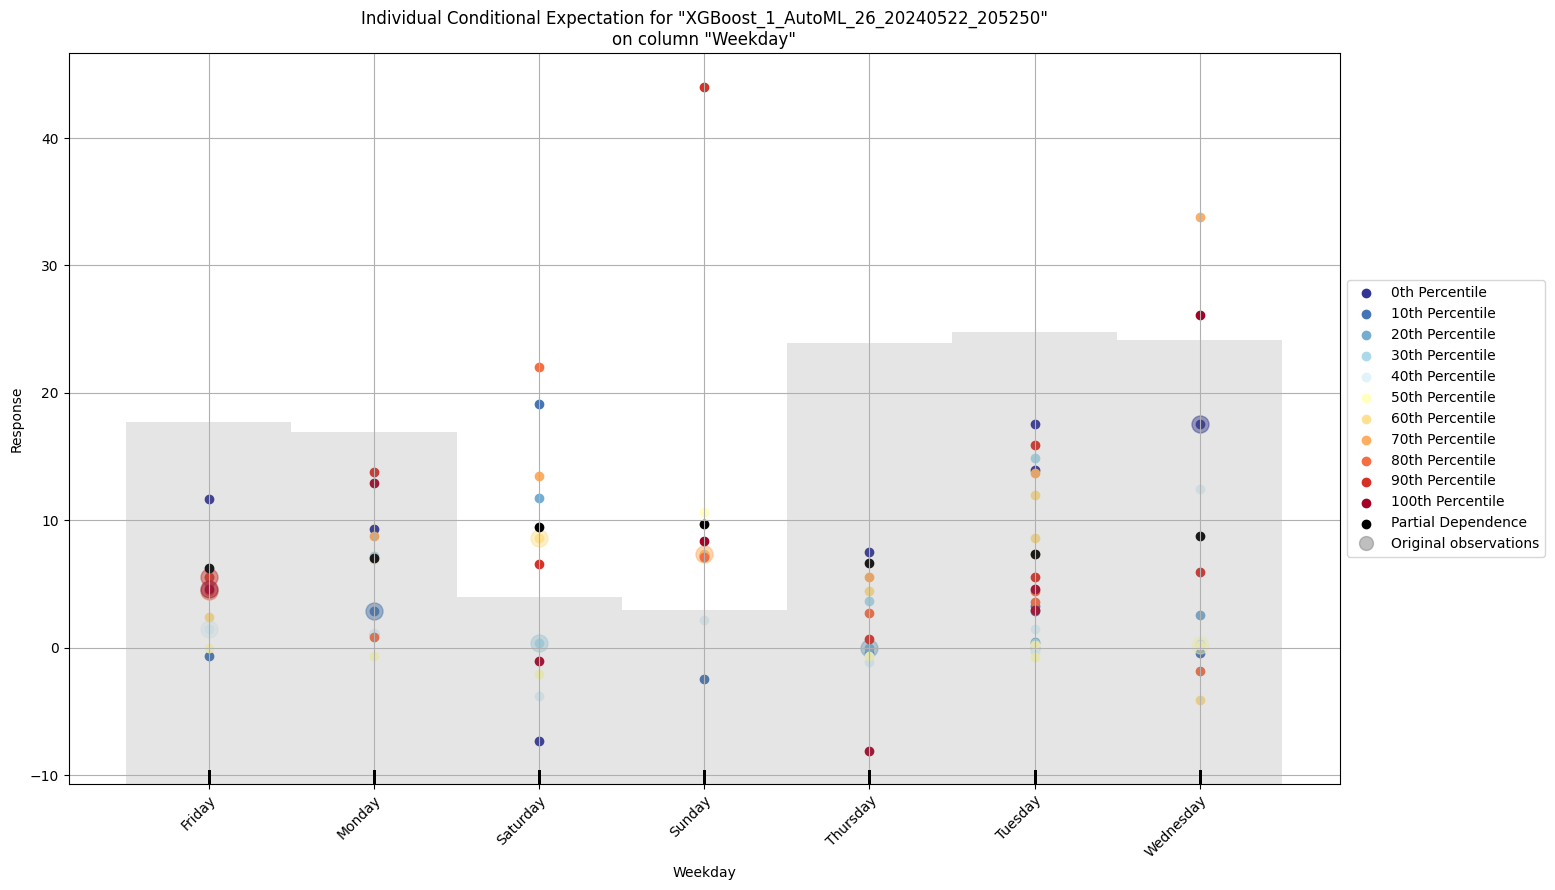

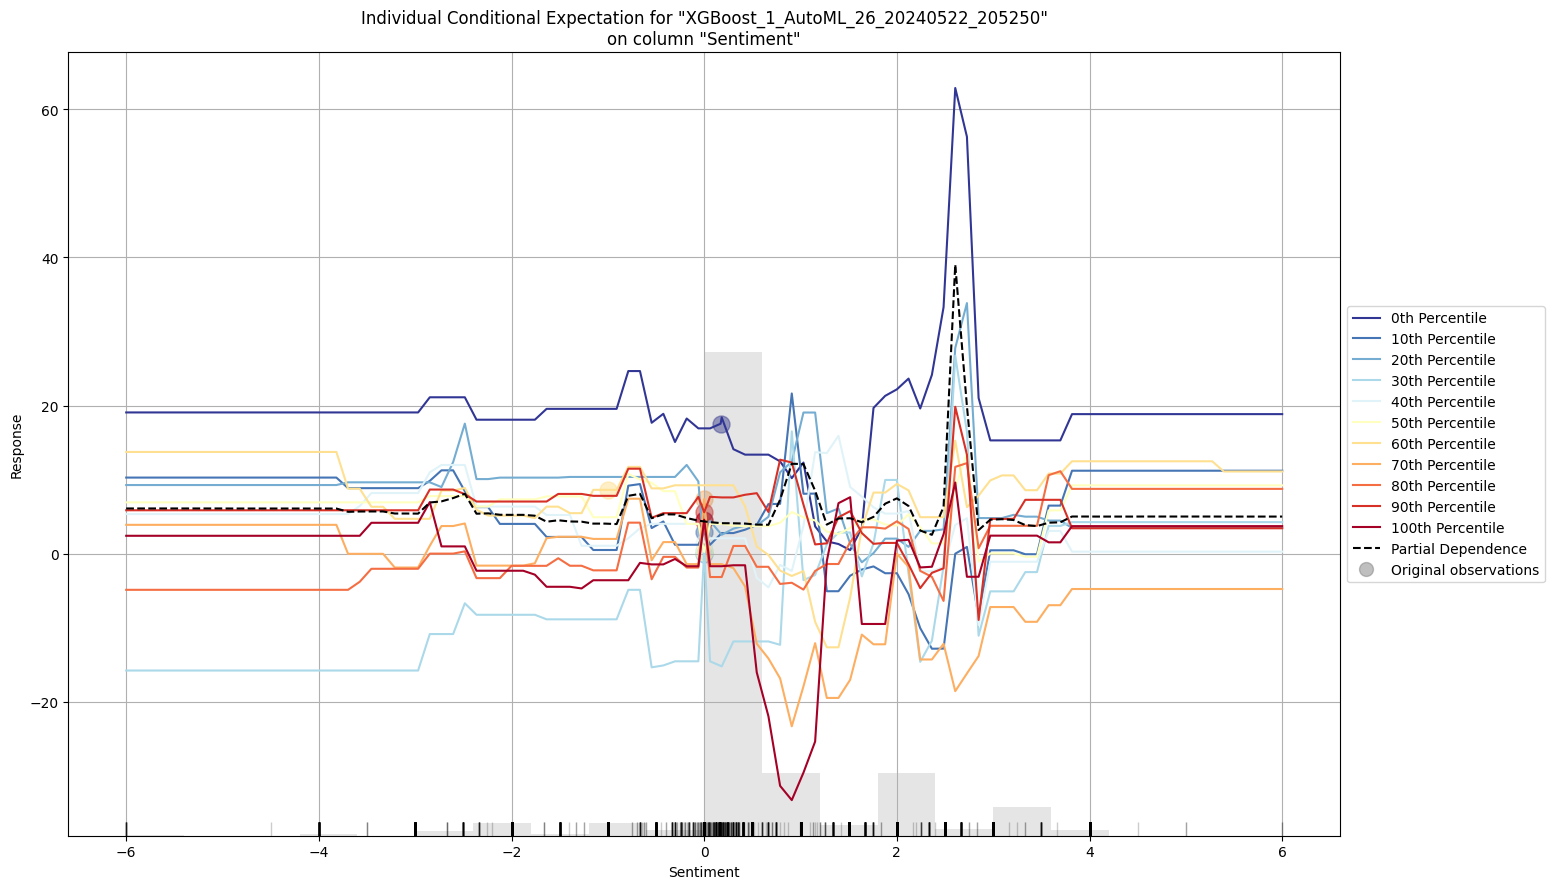

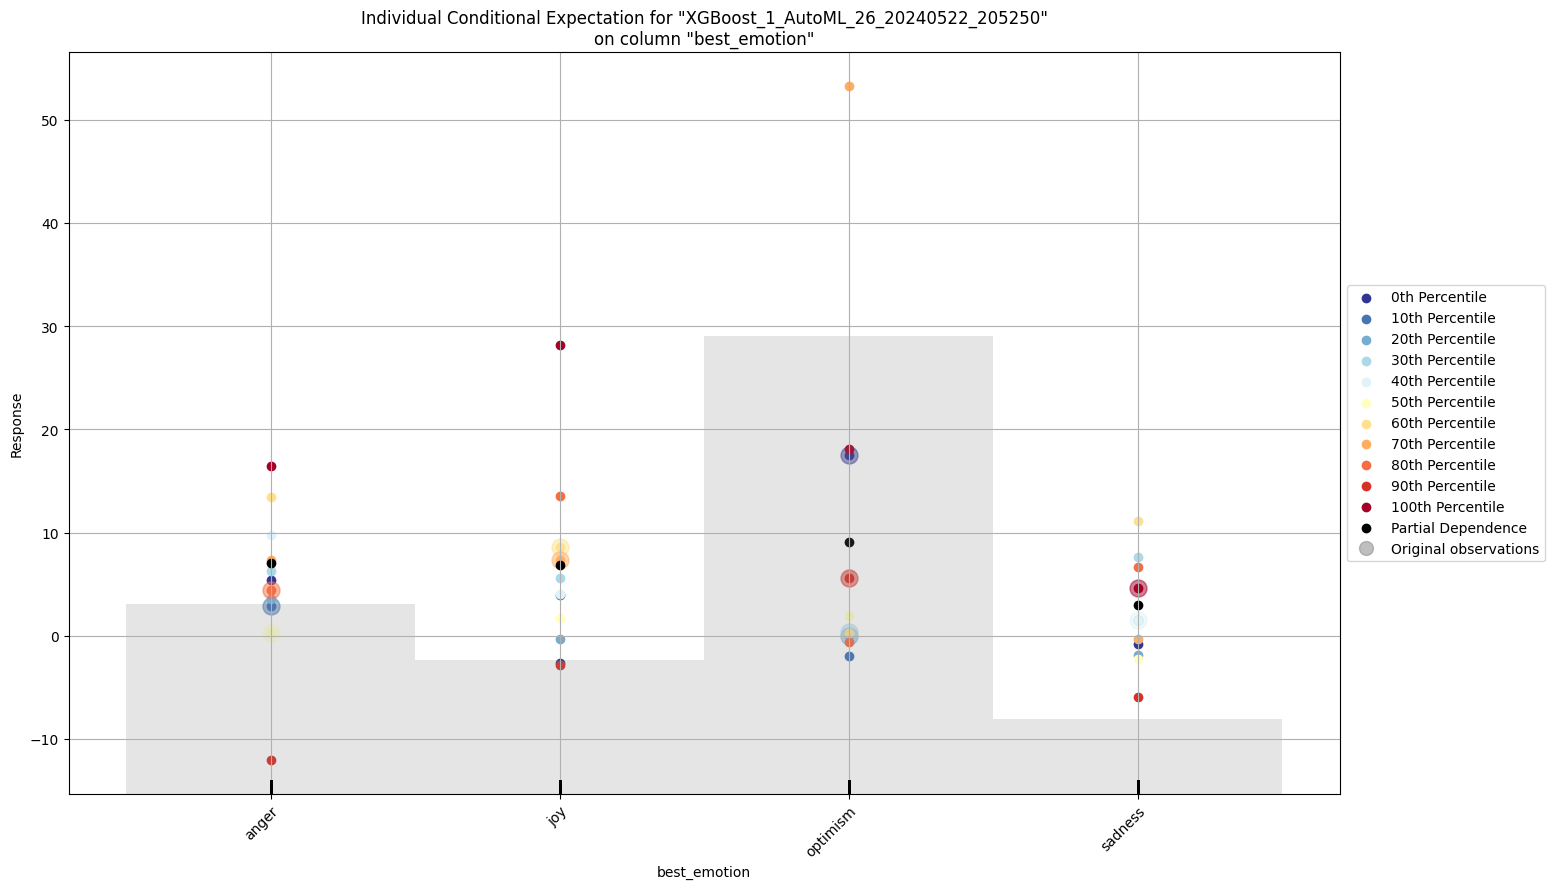

In [44]:
# model explanation for retweets
%matplotlib inline
best_model_retweets.explain(valid,render=True)

# conclusion

#### Twitter dataset was analyzed using 'Cardiffnlp/twitter-roberta-based-emotion-model' transformer model and best probable emotions were captured. This data is then appened to the original dataset and was used to train H20 Auto ML, which is an open source, predictive analytics platform for building machine learning models. 
#### Once the model was trained, we selected the best model and then used the H20's 'model.explain()' feature to plot various useful plots such as Residual Analysis, Learning Curve Plot, Variable Importance, SHAP Summary, Partial Dependence Plots and Individual Conditional Expectation plots to test on validation data to learn the impact of independent variables on 'Likes' and 'Retweets' which indicate the degree of social media engagement ( In this case, Twitter) 

#### These plots provided valuable insights on the importance of various factors on 'Likes'and 'Retweets'. key take outs from this entire analysis are:
####  1. Reach, Klout and Weekday in which a tweet is posted impacts a posts probability getting higher likes.
####  2. Reach, Klout and Sentiment are top three factors impacting the likelihood of a text getting retweeted.
####  3. Optimistic and Angry tweets are top 2 emotions to get high user engagement on a tweet.

#### PDP and ICE plots give deeper understanding of the impact of each variable on user engagement. This analysis is restricted to train 10 models only and is time restricted to strike a balance between accuracy and computational costs, keeping in mind the timeframe and scope of this project. 

## Future Scope

#### In future, there is a scope for performing sentiment analysis on the dataset using more advanced and efficient multilingual machine learning models for better emotion prediction. This is because in reality, a tweet might have more than one emotion, which when captured effectively can train machine learning model to predict an emotion more accurately. 
#### This data is mainly technical which minght limit a wide range of emotions displayed in a normal tweet. In future, the same analysis can be made on a more diverse dataset to better capture emotions.
#### With the advancements in Large Language Models, there is a possibility of greater feature extraction and more efficient models, which uses a fraction of present computation to predict better.

###### ------------------------------------------------------------------------------------------------------End of Document ----------------------------------------------------------------------------------------------------------